<h1><center>Credit Card Fraud Detection</center></h1>

In this project you will predict fraudulent credit card transactions with the help of Machine learning models.

## Problem Statement
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

 

In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

 

The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

 

## Business problem overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

 

## Understanding and defining fraud
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

Manipulation/alteration of genuine cards
Creation of counterfeit cards
Stealing/loss of credit cards
Fraudulent telemarketing
 

## Data dictionary
The data set can be downloaded using this link.

 

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

 

## Project pipeline
The project pipeline can be briefly summarised in the following four steps:

Data Understanding: Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
Exploratory data analytics (EDA): Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.

Train/Test split: Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
Model building / hyperparameter tuning: This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.

Model evaluation: Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,f1_score,auc


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import time

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
start_time = time.time()

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
# Check the shape of the dataset
df.shape

(284807, 31)

In [5]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
#observe the different feature type present in the data
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [10]:
sns.set_style('darkgrid')

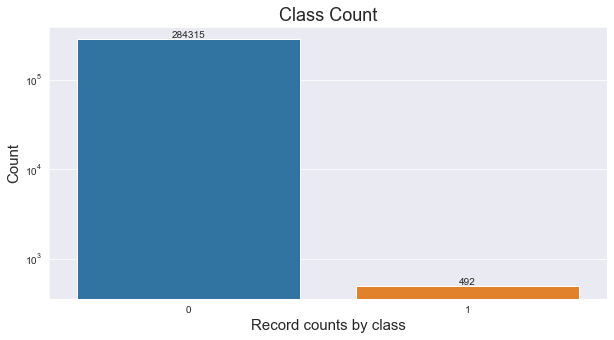

In [11]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
cnt_plt = sns.countplot(x=df['Class'])

cnt_bar=cnt_plt.patches
for rect in cnt_bar:
    y_height=rect.get_height()
    cnt_plt.text(rect.get_x()+rect.get_width()/2,1*y_height,int(y_height),ha='center',va='bottom',fontsize=10)
    
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.yscale('log')
plt.show()

In [12]:
# Create a scatter plot to observe the distribution of classes with time
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

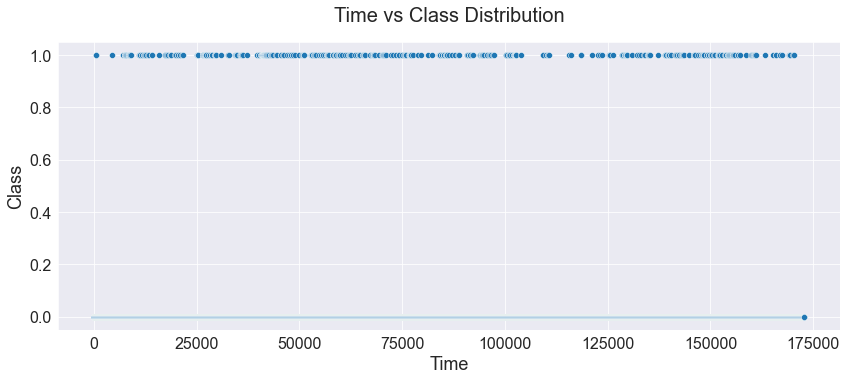

In [13]:

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)


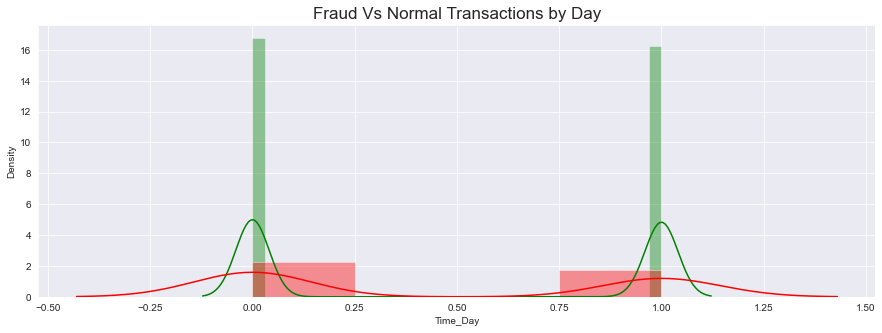

In [14]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

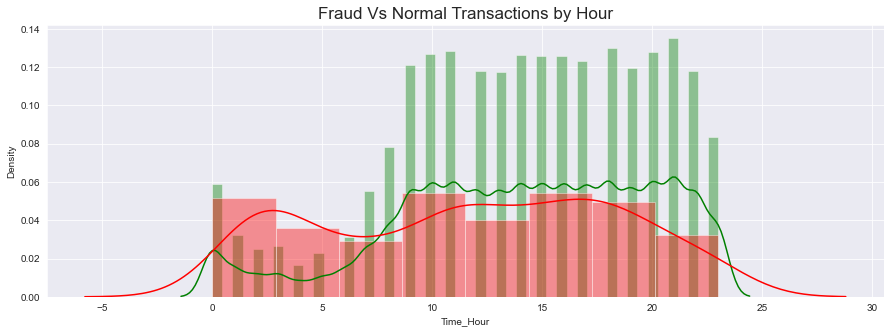

In [15]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

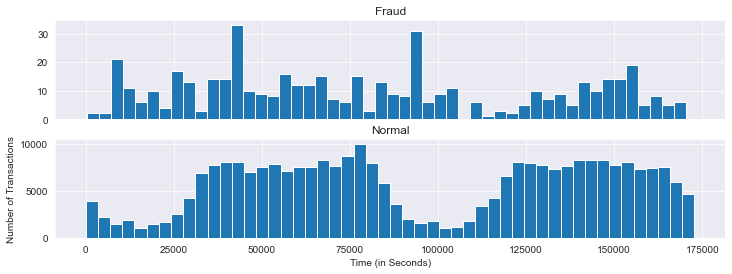

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [17]:
# Create a scatter plot to observe the distribution of classes with Amount
#Extract the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

In [18]:
# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [19]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

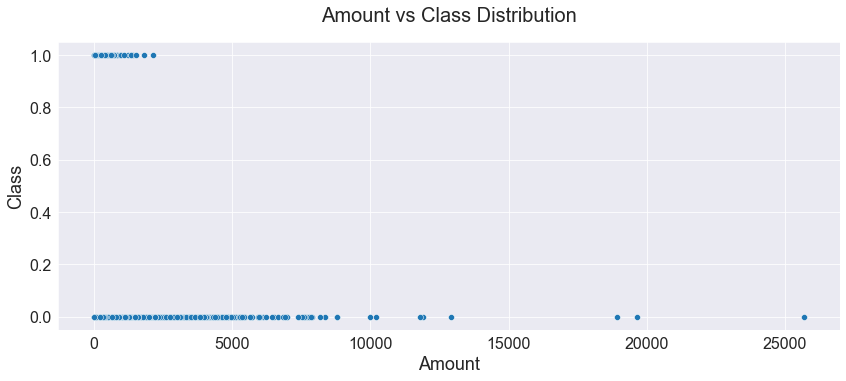

In [20]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


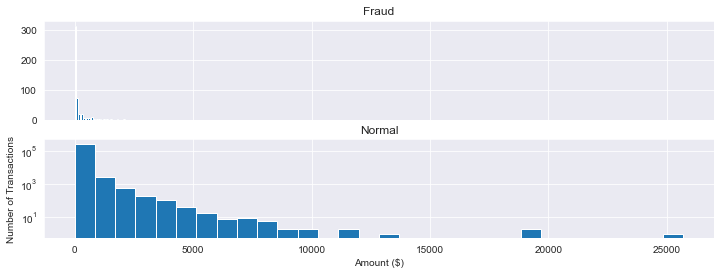

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [22]:
# Drop unnecessary columns
# to dop the unessessary columns we need to know the realtion/contribution of a feature
# towards the target variable

In [23]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

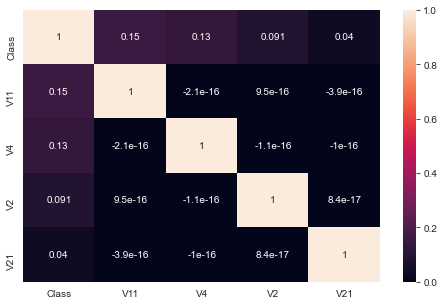

In [24]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:
plt.subplots(figsize=(8, 5))
top_corr = df[corr_initial2.head().index].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [25]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

### Splitting the data into train & test data

In [26]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [27]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25,stratify=y)

In [28]:
cols = X.columns.values

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [29]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

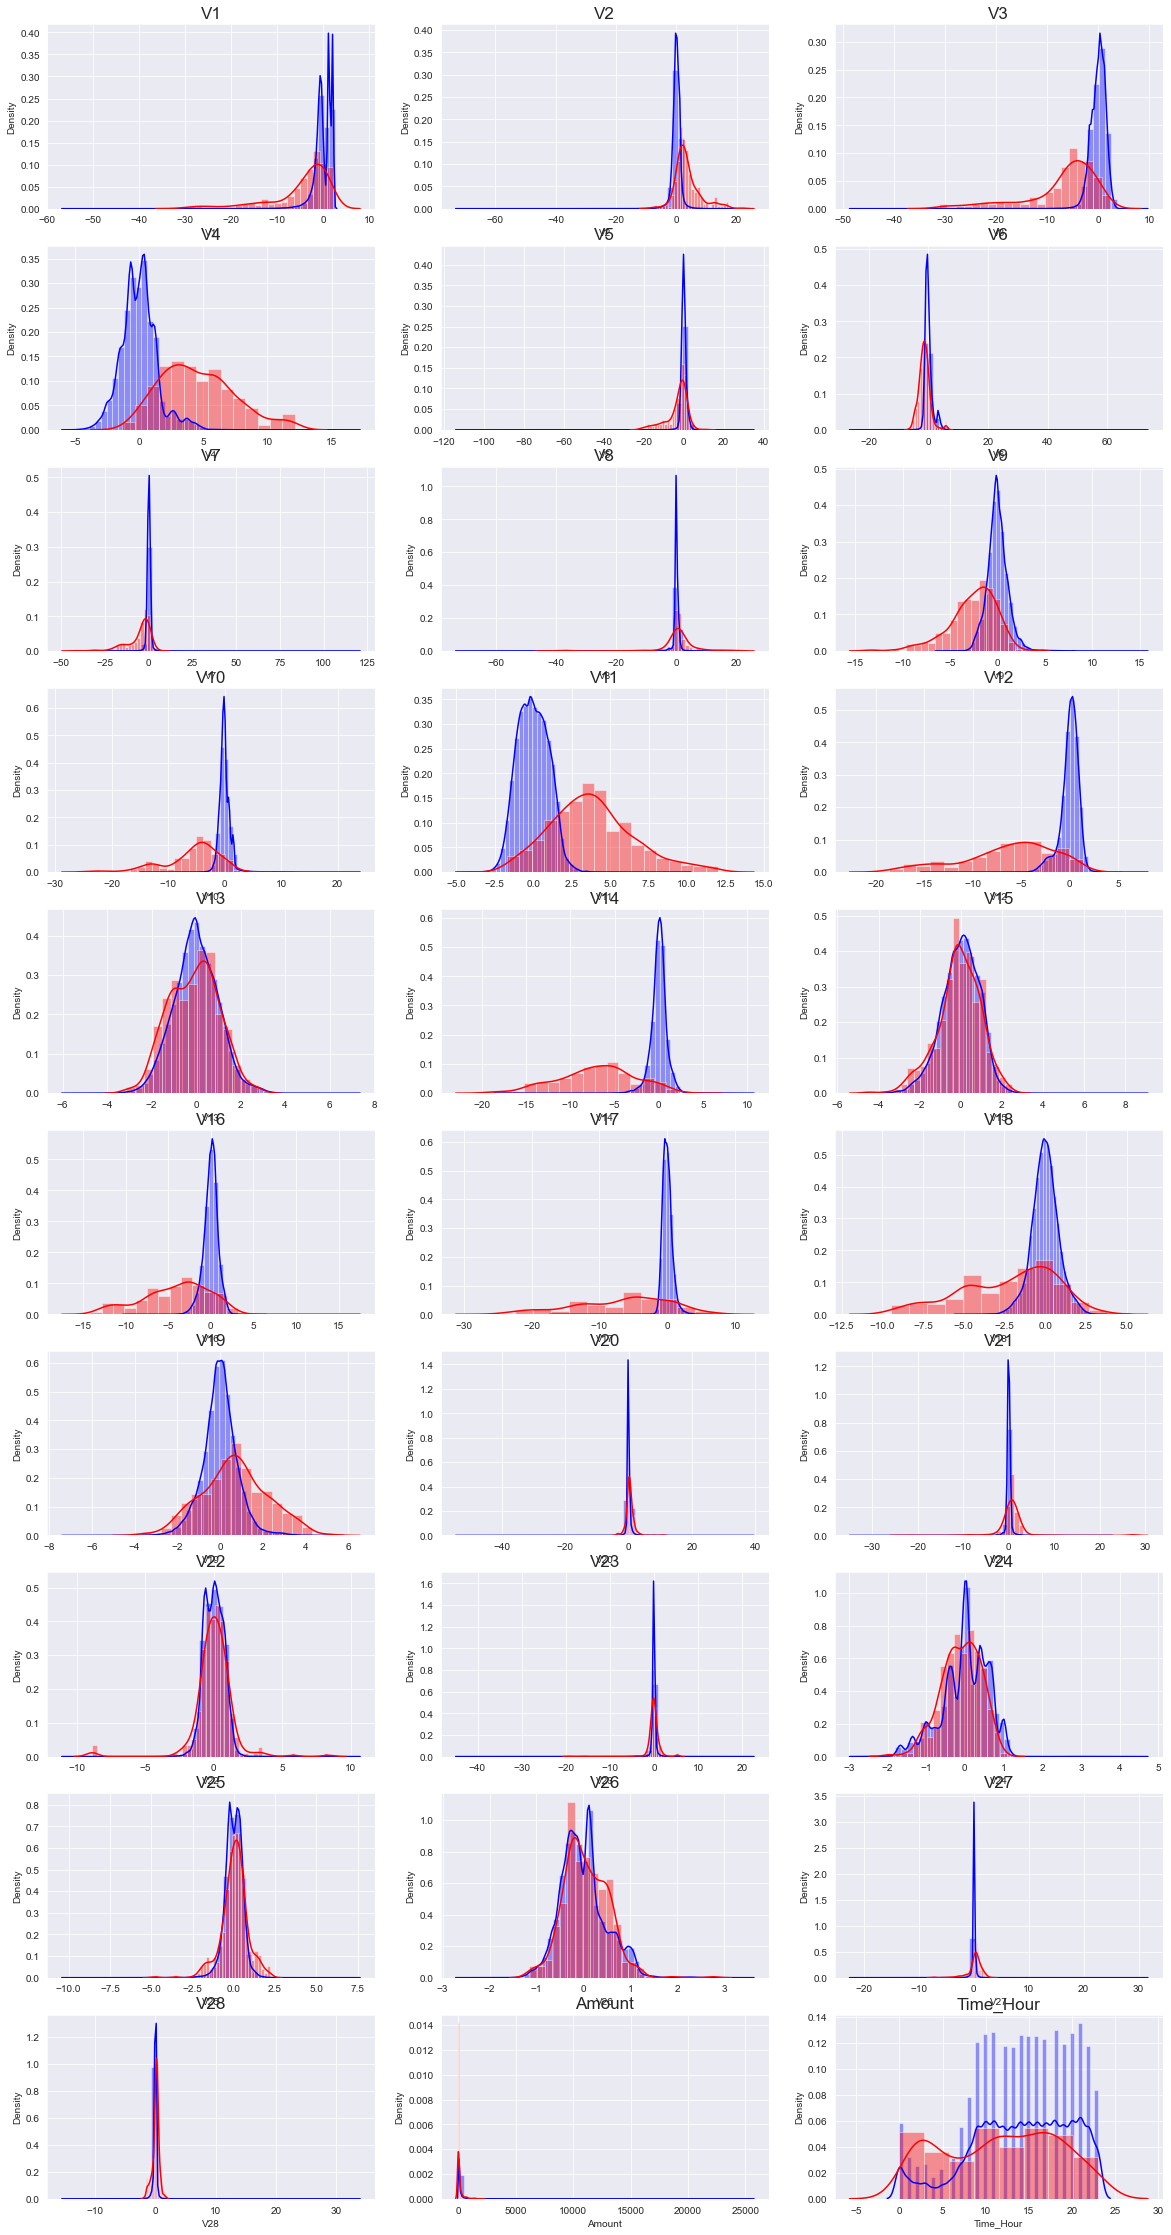

In [30]:
# plot the histogram of a variable from the dataset to see the skewness
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 40))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records], color='blue')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [31]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train = pt.transform(X_train)    ## Then apply on all data
X_test = pt.transform(X_test)

In [32]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test,   columns=cols)

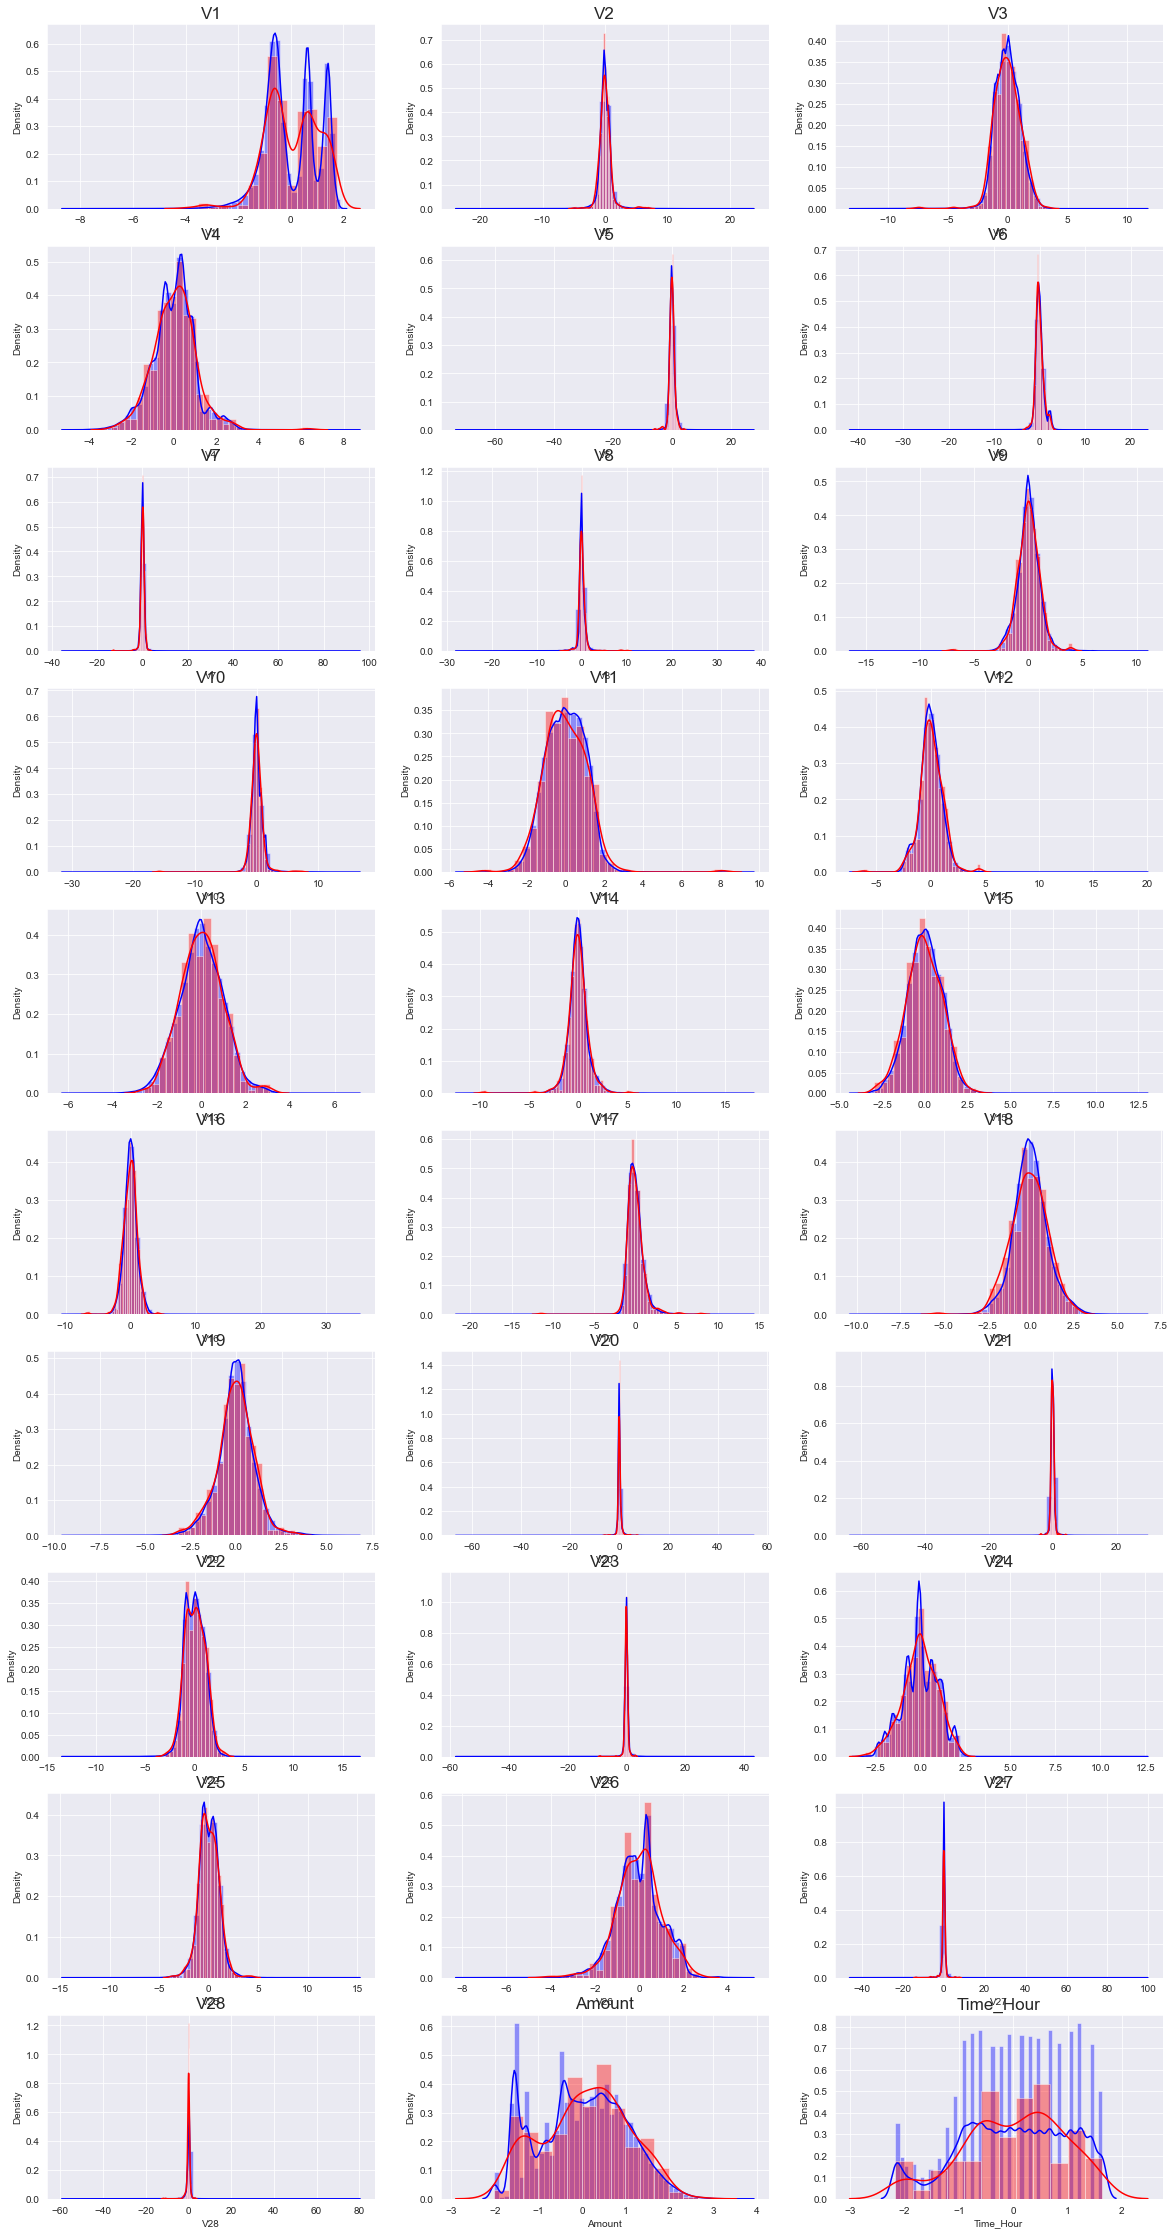

In [33]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 40))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col][normal_records], color='blue')
    sns.distplot(X_train_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()


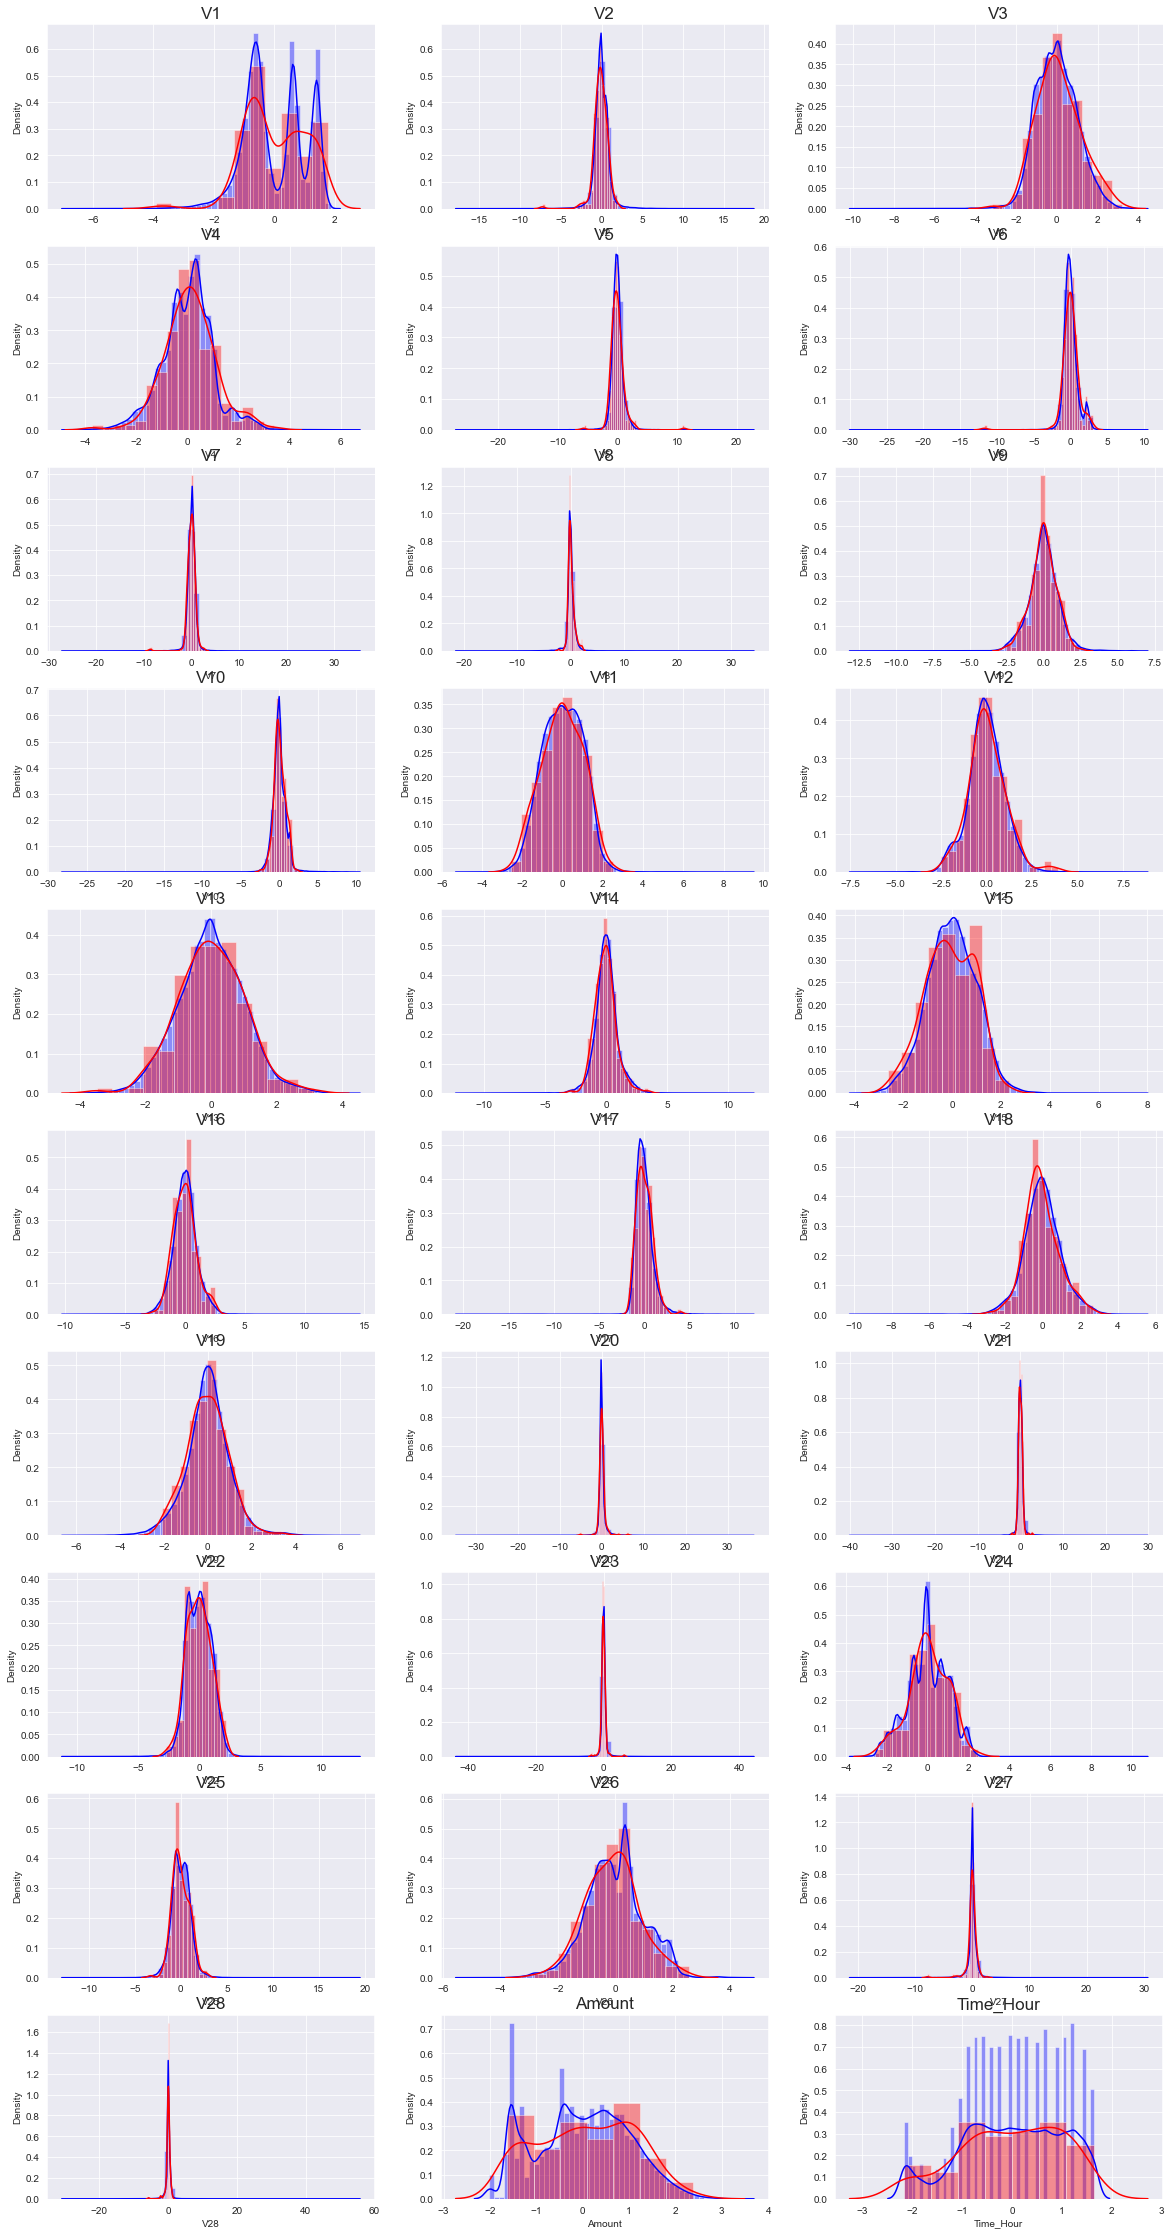

In [34]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 40))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_test_pt_df[col][normal_records], color='blue')
    sns.distplot(X_test_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

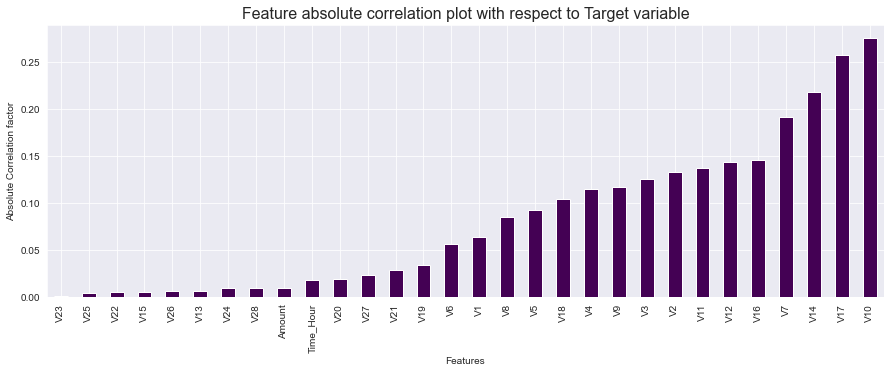

In [35]:
df_temp = X_train_pt_df.copy()
df_temp['Class'] = y_train.values
plt.figure(figsize=(15,5))
df_temp.corr()['Class'][:-1].abs().sort_values().plot(kind = 'bar', figsize=(15,5),colormap='viridis')
plt.title('Feature absolute correlation plot with respect to Target variable', fontsize = 16)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation factor');plt.show()

**From above Bivariate and correlation plots, features from V20-V28 are very less significant to consider for modeling and also Amount and Time not only less significant but also considerable multicollinearity with some of Top 10 PCA variables.
in short, we drop the features having correlation factor is than 0.03** 

**So by considering above EDA, decided to drop following features: 'Amount', 'Time' and V20 - V28.**

In [36]:
#Drop the unnecessary/ less significant features
X_train = X_train_pt_df.drop(labels = ['Amount','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1).copy()
X_test = X_test_pt_df.drop(labels = ['Amount','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1).copy()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [37]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = [0.001, 0.05, 0.01, 0.1, 10]  #--> list of values
cv_num = StratifiedKFold(n_splits=3, shuffle = True, random_state = 42) #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [38]:
#Method to plot the Confusion matrix
def confusion_matrix_plot(classifier_arg,val_test=False,mode=None):
    
   
    plt.style.use('default')
    # create subplots
    fig,(axes1,axes2)=plt.subplots(1,2,figsize=(10,5))
    
    if val_test:     
        # plot a confusion matrix for test data
        plot_confusion_matrix(classifier_arg,X_test,y_test,cmap=plt.cm.Blues,ax=axes1)
    else :
        train_data = X_train if mode==None else eval("X_train_"+mode)
        train_target =  y_train if mode==None else eval("y_train_"+mode)
        # plot a confusion matrix for test data
        plot_confusion_matrix(classifier_arg,train_data,train_target,cmap=plt.cm.Blues,ax=axes1)
        
    # set title for the plot
    axes1.set_title('Confusion Matrix')
    axes2.set(xlabel='',ylabel='',xticklabels=[],yticklabels=[],xticks=[],yticks=[],title='Metrics')
    if val_test:
        axes2.text(0.15,0.3,'\n\nAccuracy Score for Test set: '+str(metric['Test Accuracy'])+'\n\nRecall Score for Test set: '+str(metric['Test Recall'])+'\n\nPrecision Score for Test set: '+str(metric['Test Precision'])+'\n\nAUC Score for Test set: '+str(metric['Test ROC-AUC'])+'\n\nF1-Score for Test set: '+str(metric['Test F1-Score']))
    else:
        axes2.text(0.15,0.3,'Accuracy Score for Train set: '+str(metric['Train Accuracy'])+'\n\nRecall Score for Train set: '+str(metric['Train Recall'])+'\n\nPrecision Score for Train set: '+str(metric['Train Precision'])+'\n\nAUC Score for Train set: '+str(metric['Train ROC-AUC'])+'\n\nF1-Score for Train set: '+str(metric['Train F1-Score']))
    # show plot
    plt.show()
    

In [39]:
def roc_curve_prec_curve(name,val_test=False,mode=None):
    
    sns.set_style('darkgrid')
    # create subplots
    fig,(axes1,axes2) = plt.subplots(1,2,figsize=(10,5))
    
    if val_test:
        y_true = y_test
        y_pred_prb = test_pred_proba[:,1] 
    else :
        y_true = y_train if mode==None else eval("y_train_"+mode)
        y_pred_prb = train_pred_proba[:,1]
    
    # plot roc curve for y_test and predicted probaility   
    fpr,tpr,thres=roc_curve(y_true,y_pred_prb,drop_intermediate = False)
   
    if val_test:
        # add the Threshold value as the final metric to model
        metric['Test threshold'] = thres[np.argmax(tpr-fpr)]
        train_y = y_train if mode==None else eval("y_train_"+mode)
        fpr_train,tpr_train,thres_train=roc_curve(train_y, train_pred_proba[:,1], drop_intermediate = False)
        metric['Train threshold'] = thres_train[np.argmax(tpr_train-fpr_train)]
    else:
        metric['Train threshold'] = thres[np.argmax(tpr-fpr)]
        
    auc_score = metrics.roc_auc_score(y_true, y_pred_prb)
    
    axes1.plot([0,1],[0,1],'k--')
    
    # plt False Positive Rate and True Positive Rate
    axes1.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    
    # set labels and title for the subplot
    axes1.set_xlabel('False positive Rate')
    axes1.set_ylabel('True Positive rate')
    axes1.set_title('ROC Curve')
    axes1.legend(loc="lower right")
    
    # plot precision recall curve
    prec,recal,thres=precision_recall_curve(y_true,y_pred_prb)
    
    # plt False Positive Rate and True Positive Rate
    axes2.plot(thres, prec[:-1], 'g-', label= 'precision')
    axes2.plot(thres, recal[:-1], 'r-', label= 'recall')
    
    # set axis labels and title
    axes2.set_xlabel('Recall')
    axes2.set_ylabel('Precision')
    axes2.set_title('Precision-Recall Curve')
    axes1.legend(loc="lower right")
    plt.show()
  
    model_eval[name] = metric

In [40]:
#Method to print Accuracy,Precision,recall and ROC score
model_eval = {}
def calculate_metrics(val_test=False,mode=None):

    y_train_mode = y_train if mode==None else eval("y_train_"+mode)

    # initialize a dict
    metric = {}

    # calcuate Accuracy Score for Training data
    metric['Train Accuracy'] = round(accuracy_score(y_train_mode,y_train_pred)*100,2)

    # calculate Recall for Test data
    metric['Train Recall'] = round(recall_score(y_train_mode,y_train_pred)*100,2)

    # calcuate Precision for Test Data
    metric['Train Precision'] = round(precision_score(y_train_mode,y_train_pred)*100,2)

    # calcuate AUC for Test Data
    metric['Train ROC-AUC'] = round(roc_auc_score(y_train_mode,train_pred_proba[:,1])*100,2)

    # calcuate F1-Score for Test Data
    metric['Train F1-Score'] = round(f1_score(y_train_mode,y_train_pred)*100,2)
    
    if val_test :
        metric['Test Accuracy'] = round(accuracy_score(y_test,y_test_pred)*100,2)
        metric['Test Recall'] = round(recall_score(y_test,y_test_pred)*100,2)
        metric['Test Precision'] = round(precision_score(y_test,y_test_pred)*100,2)
        metric['Test ROC-AUC'] = round(roc_auc_score(y_test,test_pred_proba[:,1])*100,2)
        metric['Test F1-Score'] = round(f1_score(y_test,y_test_pred)*100,2)

    return metric
    

In [41]:
def fit_predict(classifier_model,params,val_test=False,mode=None):
    
    train_data_X = X_train if mode==None else eval("X_train_"+mode)
    train_data_Y = y_train if mode==None else eval("y_train_"+mode)

    if val_test == False:   
        classifier_model = GridSearchCV(estimator=classifier_model, param_grid=params, cv=cv_num, scoring='roc_auc', n_jobs=-1)

    classifier_model.fit(train_data_X,train_data_Y)

    #lets now predict on Test and Train data set    
    if val_test:
        y_pred = classifier_model.predict(X_test)
        pred_proba = classifier_model.predict_proba(X_test)
    else:
        y_pred = classifier_model.predict(train_data_X)
        pred_proba = classifier_model.predict_proba(train_data_X)

    return y_pred,pred_proba,classifier_model

### HYPERPARAMETERS

In [42]:
hyperparameters = {}

###########################
### Logistic Regression ###
###########################

# initialize hybper parameters
hyperparameters_log = {"penalty":["l1","l2"],"solver":["liblinear","lbfgs",'newton-cg'],\
                   "max_iter":[100,500,1000],"tol":[0.0001,0.001,0.01,0.1],"fit_intercept":[True],\
                   "C":num_C}


###########################
### K NEAREST NEIGHBORS ###
###########################
# #List Hyperparameters that we want to tune.
leaf_size = [30] # default
n_neighbors = [5] # default

# #Convert to dictionary
hyperparameters_knn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)


#####################
### DECISION TREE ###
#####################
#List Hyperparameters that we want to tune.
max_depth = [5,10,15]
criterion = ["entropy", "gini"]
min_samples_split = [10,20]

#Convert to dictionary
hyperparameters_dec = dict(max_depth=max_depth, criterion=criterion)


####################
### RANDOM FOREST ###
####################
#List Hyperparameters that we want to tune.
n_estimators= [100,150,200]
max_depth=[12,14,16]
min_samples_split = [10,20]
criterion=["entropy", "gini"]

#Convert to dictionary
hyperparameters_fst = dict(min_samples_split=min_samples_split, \
                       max_depth=max_depth,
                       n_estimators=n_estimators,\
                       criterion=criterion)

###############
### XGBOOST ###
###############
hyperparameters_xgb = {  "learning_rate"    : [0.15,0.175,0.25],
                     "gamma"            : [0.15,0.175,0.2],
                     "n_estimators"    : [50,60,70,80]
                  }

## Logistic Regression

In [43]:
#create an instance of linear regression
log_reg=LogisticRegression(random_state=42,n_jobs=-1)

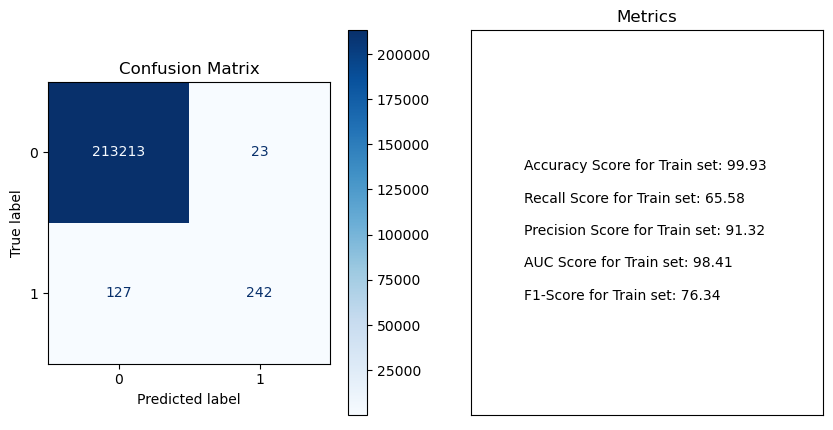

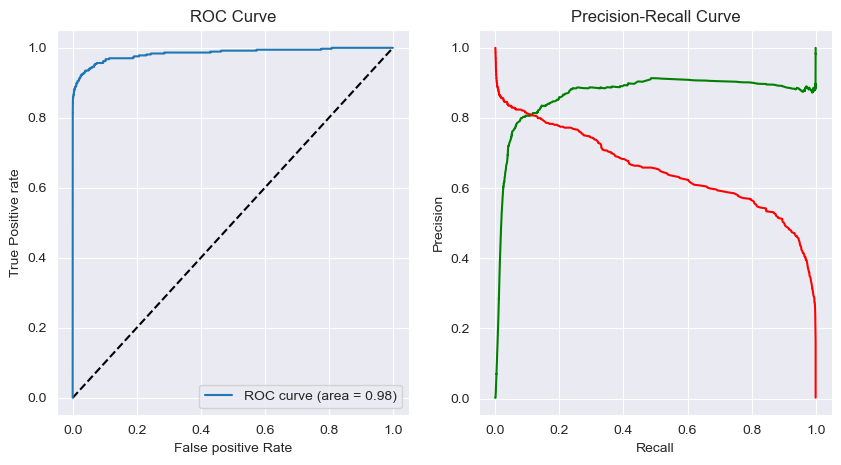

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.01,
 'verbose': 0,
 'warm_start': False}

In [44]:
# fit and predict Logistic model
y_train_pred,train_pred_proba,log_model= fit_predict(log_reg,hyperparameters_log)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(log_model)

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression")

log_model.best_estimator_.get_params()

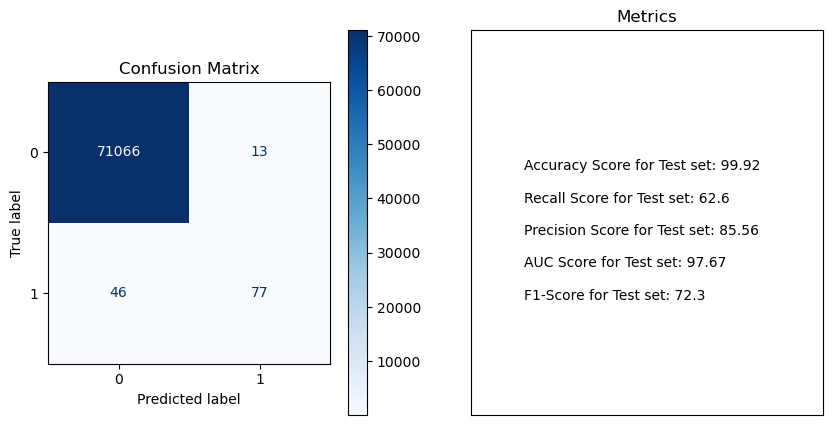

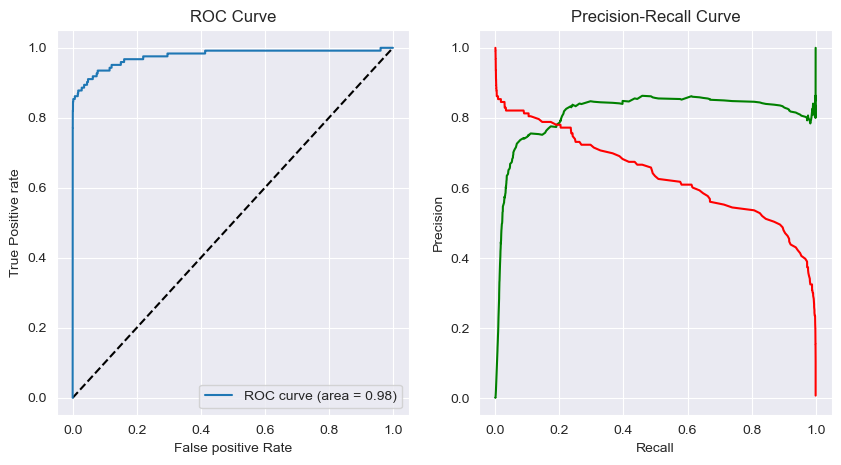

In [45]:
lg = LogisticRegression(random_state=42, n_jobs=-1)

lg.set_params(**log_model.best_estimator_.get_params())

# fit and predict Logistic model
y_test_pred,test_pred_proba,lg_model= fit_predict(lg,hyperparameters,val_test=True)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True)

# plot a confusion matirx for model 
confusion_matrix_plot(lg_model,True)

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression",True)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## K NEAREST NEIGHBORS

In [46]:
#create an instance of knn
knnc=KNeighborsClassifier(n_jobs=-1)

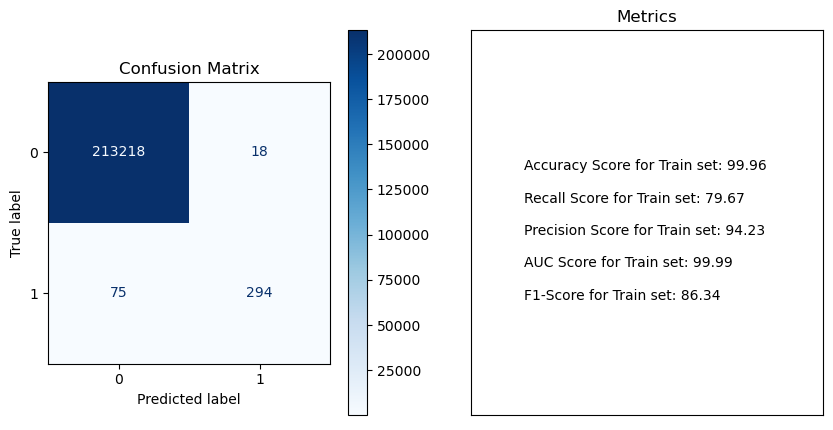

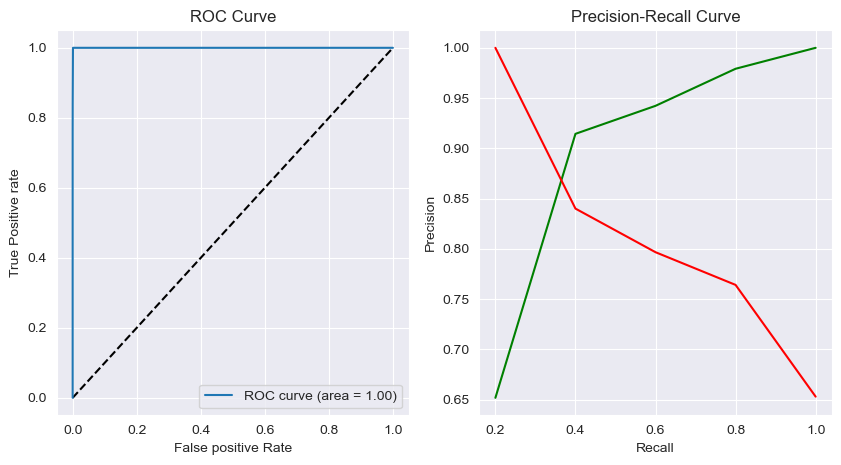

Wall time: 3min 36s


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
%%time

# fit and predict KNN model
y_train_pred,train_pred_proba,knnc_model= fit_predict(knnc,hyperparameters_knn)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(knnc_model)

# plot a ROC cure and Precision-recall curve for the KNN Model
roc_curve_prec_curve("K Nearest Neighbours")

knnc_model.best_estimator_.get_params()

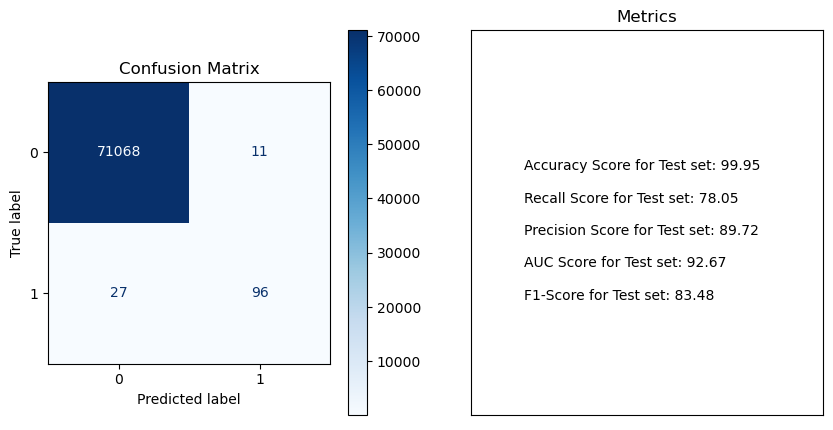

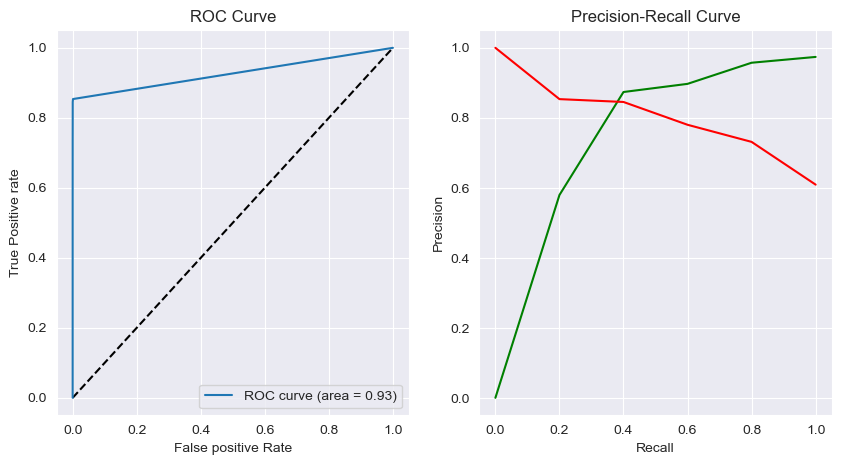

In [48]:
#create an instance of knn
knn=KNeighborsClassifier(n_jobs=-1)

knn.set_params(**knnc_model.best_estimator_.get_params())

# fit and predict KNN model
y_test_pred,test_pred_proba,knn_model= fit_predict(knn,hyperparameters,True)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True)

# plot a confusion matirx for model 
confusion_matrix_plot(knn_model,True)

# plot a ROC cure and Precision-recall curve for the KNN Model
roc_curve_prec_curve("K Nearest Neighbours",True)

## DECISION TREE

In [49]:
#create an instance of decisiontree
dec_tree=DecisionTreeClassifier(random_state=42)

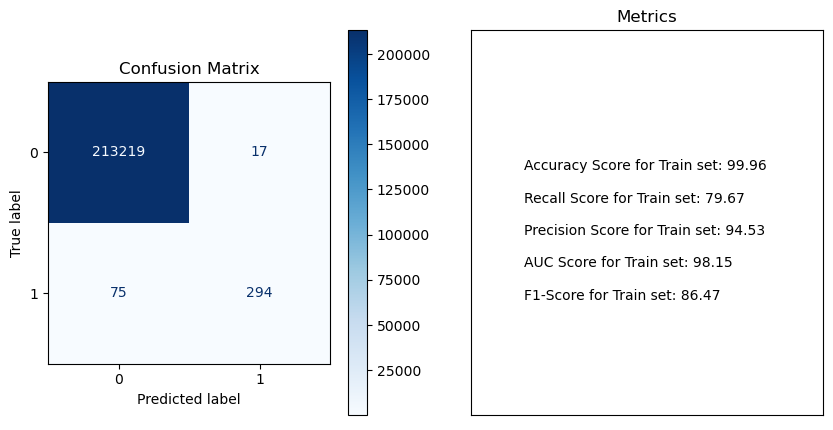

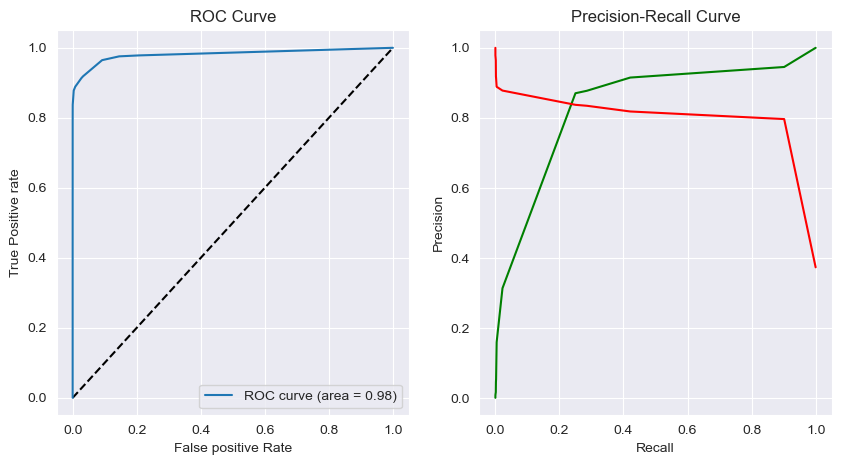

Wall time: 8.84 s


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [50]:
%%time

# fit and predict Decision Tree model
y_train_pred,train_pred_proba,dec_tree_model= fit_predict(dec_tree,hyperparameters_dec)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(dec_tree_model)

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree")

dec_tree_model.best_estimator_.get_params()

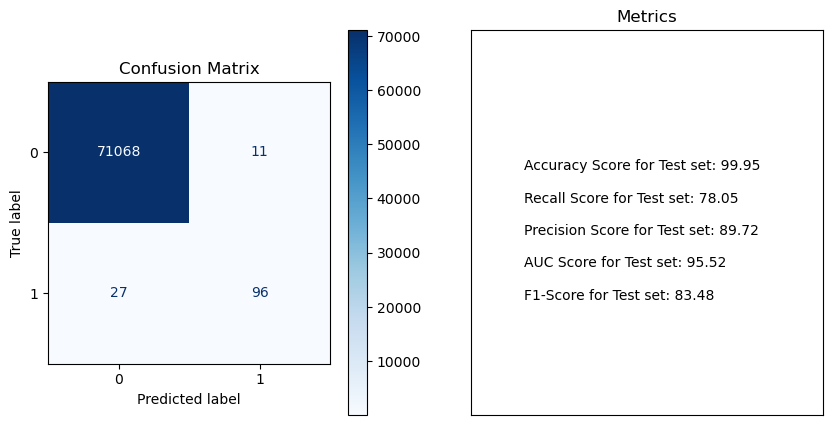

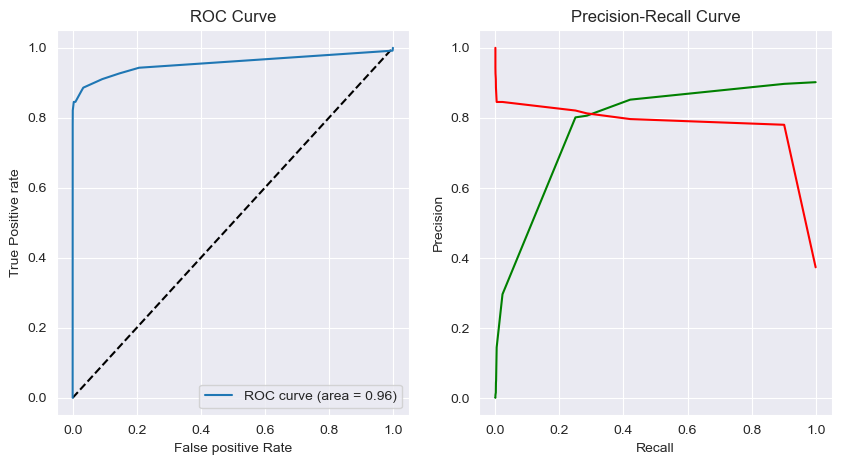

In [51]:
#create an instance of decisiontree
tree=DecisionTreeClassifier(random_state=42)

tree.set_params(**dec_tree_model.best_estimator_.get_params())

# fit and predict Decision Tree model
y_test_pred,test_pred_proba,tree_model= fit_predict(tree,hyperparameters,True)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True)

# plot a confusion matirx for model 
confusion_matrix_plot(tree_model,True)

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree",True)

## RANDOM FOREST

In [52]:
#create an instance of randomforest
randm_frst=RandomForestClassifier(bootstrap=False,random_state=42,n_jobs=-1)

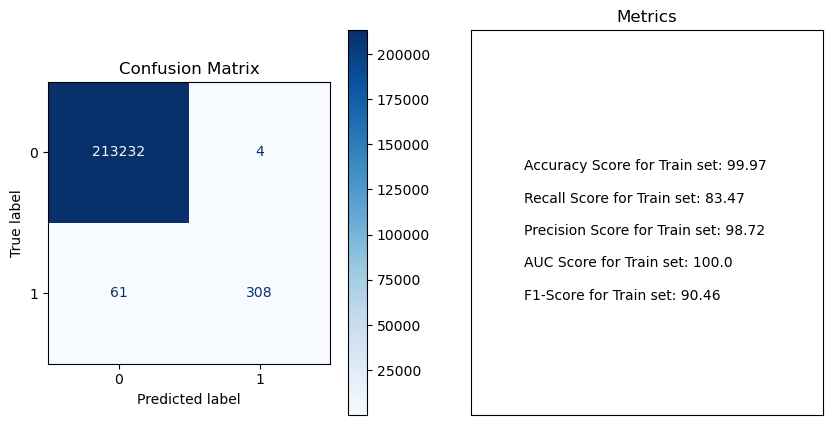

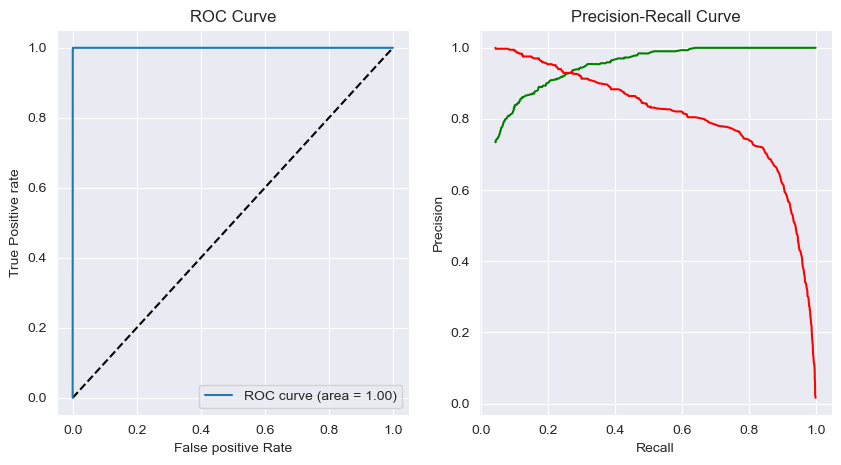

Wall time: 15min 44s


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [53]:
%%time

# fit and predict Random Forest model
y_train_pred,train_pred_proba,randm_frst_model = fit_predict(randm_frst,hyperparameters_fst)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(randm_frst_model)

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest")

randm_frst_model.best_estimator_.get_params()

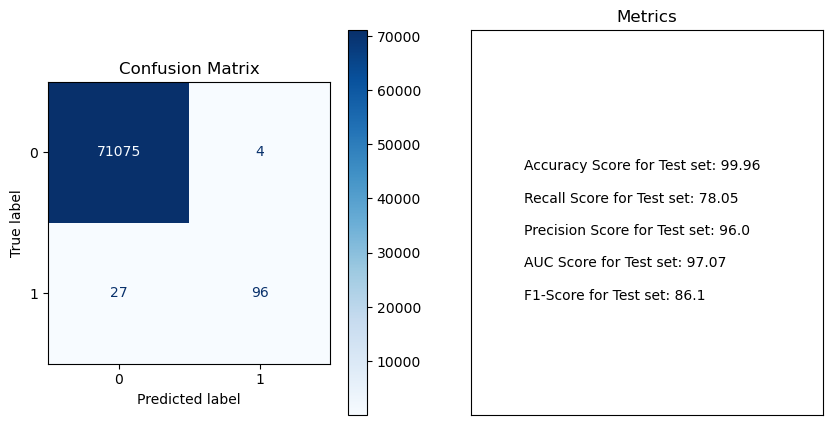

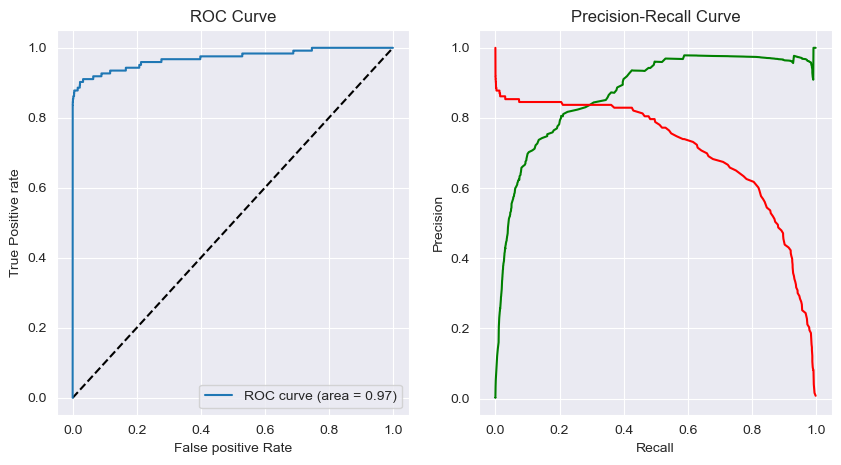

In [54]:
#create an instance of randomforest
forest=RandomForestClassifier(random_state=42,n_jobs=-1)

forest.set_params(**randm_frst_model.best_estimator_.get_params())

# fit and predict Random Forest model
y_test_pred,test_pred_proba,forest_model= fit_predict(forest,hyperparameters,val_test=True)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True)

# plot a confusion matirx for model 
confusion_matrix_plot(forest_model,True)

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest",True)

## XGBOOSTING

In [55]:
xg_bst = XGBClassifier(random_state=42,n_jobs=-1)

[06:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


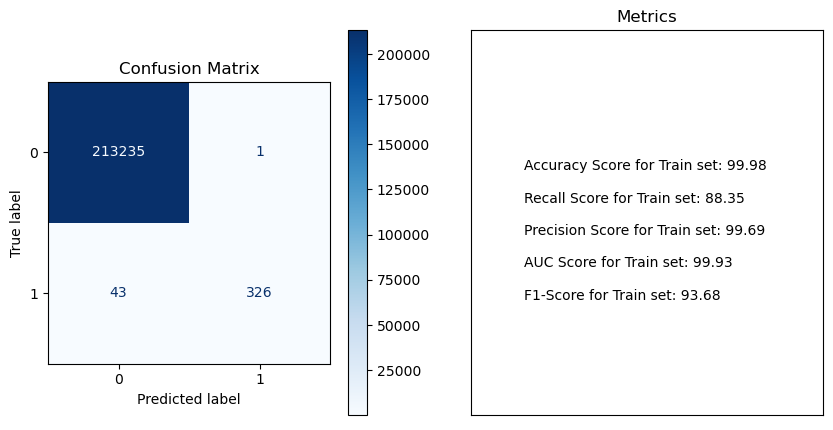

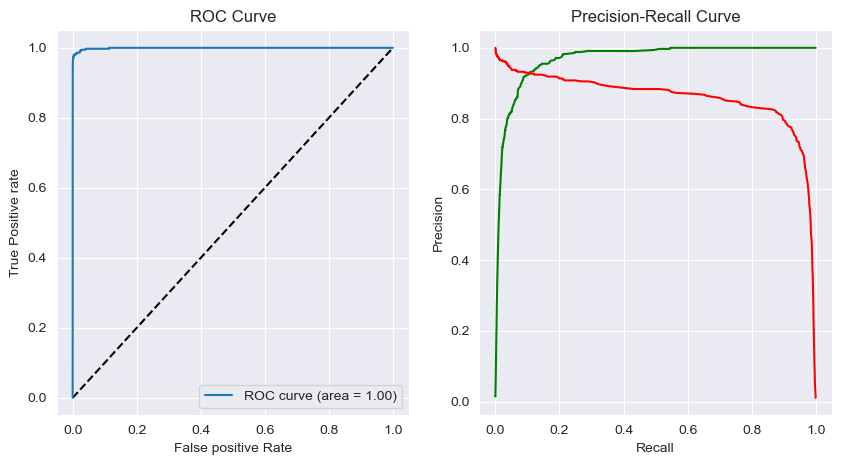

Wall time: 4min 1s


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.15,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.15,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 50,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [56]:
%%time

# fit and predict XGBoost model to dataset obtained through RFE
y_train_pred,train_pred_proba,xg_bst_model = fit_predict(xg_bst,hyperparameters_xgb)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics()

# plot a confusion matirx for model 
confusion_matrix_plot(xg_bst_model)

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost")

xg_bst_model.best_estimator_.get_params()

[06:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


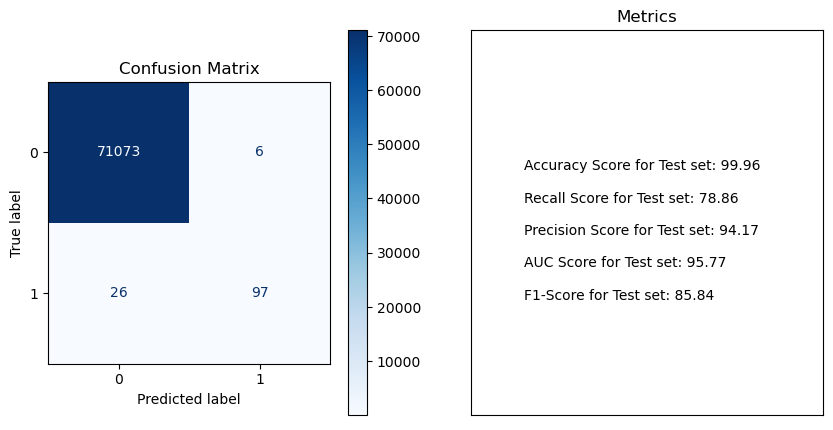

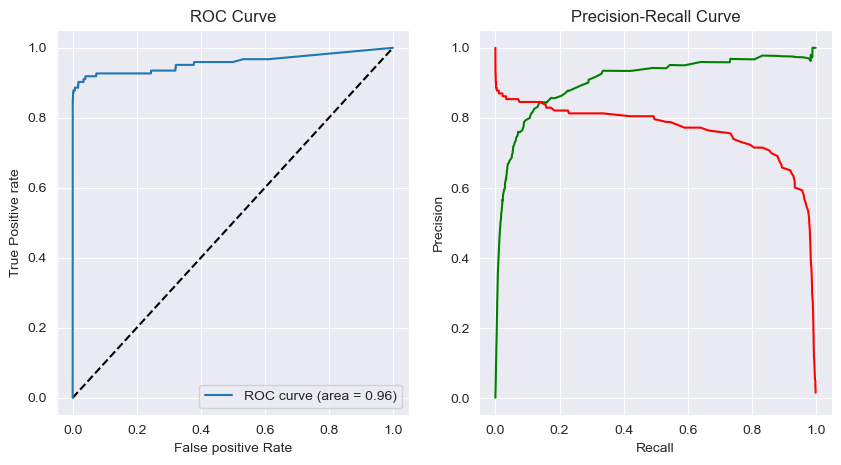

In [57]:
#create an instance of decisiontree
xgb=XGBClassifier(random_state=42,n_jobs=-1)

xgb.set_params(**xg_bst_model.best_estimator_.get_params())

# fit and predict XGBoost model to dataset obtained through RFE
y_test_pred,test_pred_proba,xgb_model = fit_predict(xgb,hyperparameters,val_test=True)

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True)

# plot a confusion matirx for model 
confusion_matrix_plot(xgb_model,True)

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost",True)

In [58]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T.head()
model_summary.style.set_properties(
    subset=['Test ROC-AUC'], 
    **{'font-weight': 'bold'}
).highlight_max(subset=['Test ROC-AUC'], color = 'lightgreen',axis=0)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


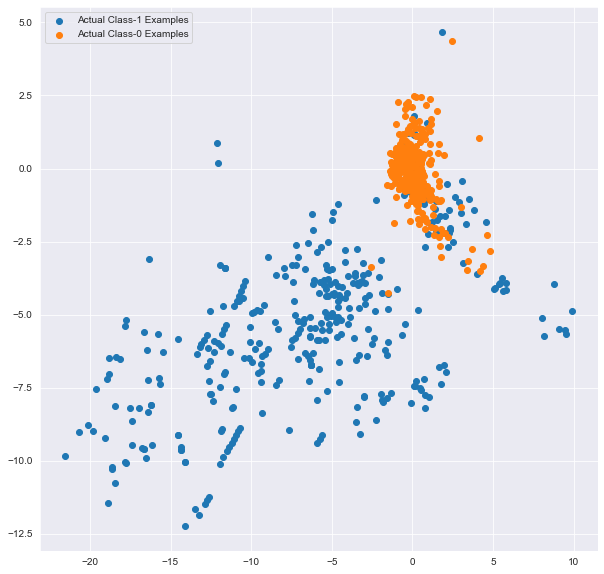

In [59]:
var_imp = []
for i in xgb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

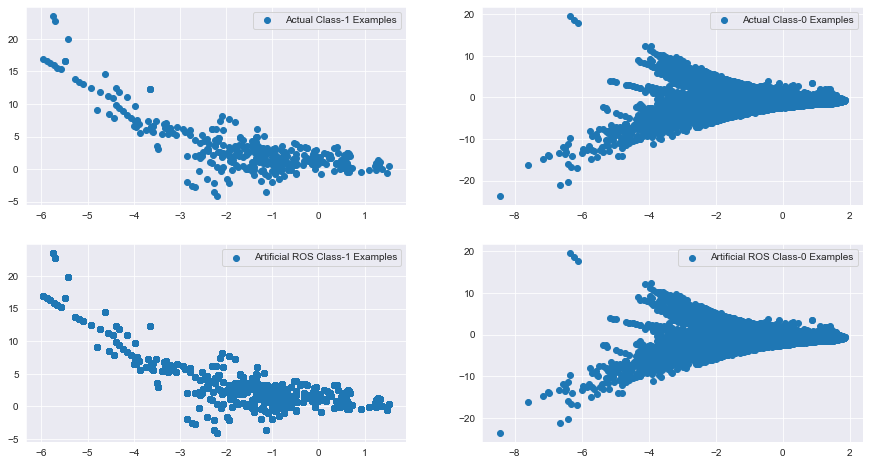

In [60]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_ros_1 = X_train_ros.to_numpy()[np.where(y_train_ros==1.0)]
X_train_ros_0 = X_train_ros.to_numpy()[np.where(y_train_ros==0.0)]

plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_train_ros_1[:, 0], X_train_ros_1[:, 1],label='Artificial ROS Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_train_ros_0[:, 0], X_train_ros_0[:, 1],label='Artificial ROS Class-0 Examples')
plt.legend()

plt.show()

## Logistic regression

In [61]:
#create an instance of linear regression
log_reg_ros=LogisticRegression(random_state=42,n_jobs=-1)

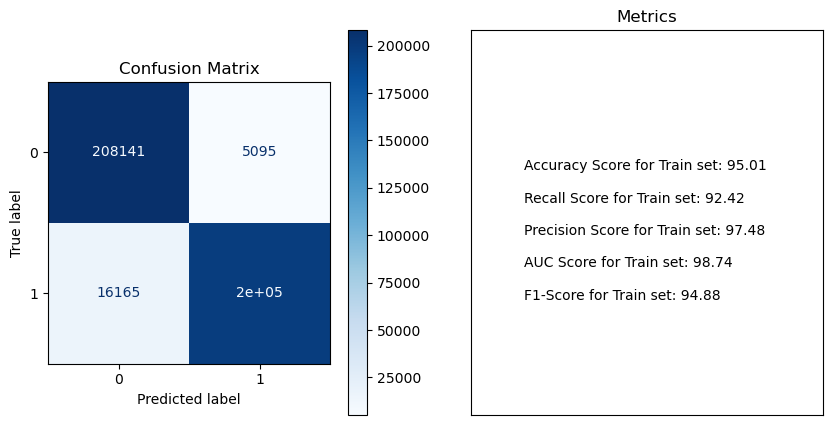

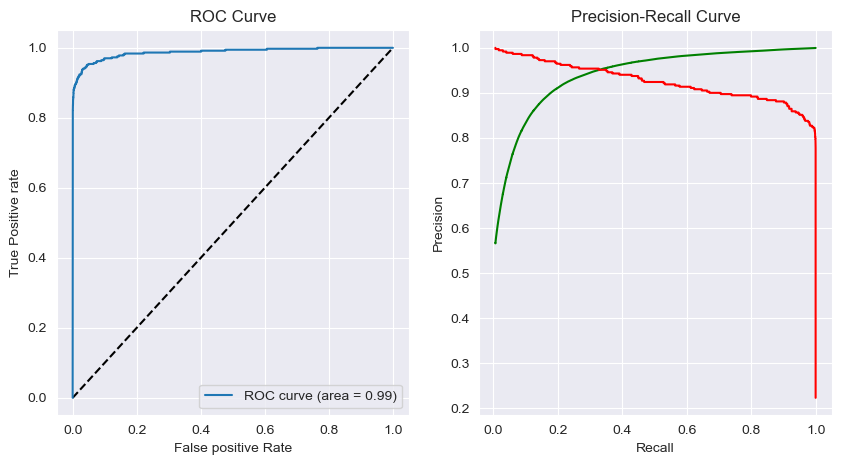

Wall time: 5min 12s


{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
%%time

# fit and predict Logistic model
y_train_pred,train_pred_proba,log_model_ros= fit_predict(log_reg_ros,hyperparameters_log,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ros')

# plot a confusion matirx for model 
confusion_matrix_plot(log_model_ros,mode='ros')

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression ROS",mode='ros')

log_model_ros.best_estimator_.get_params()

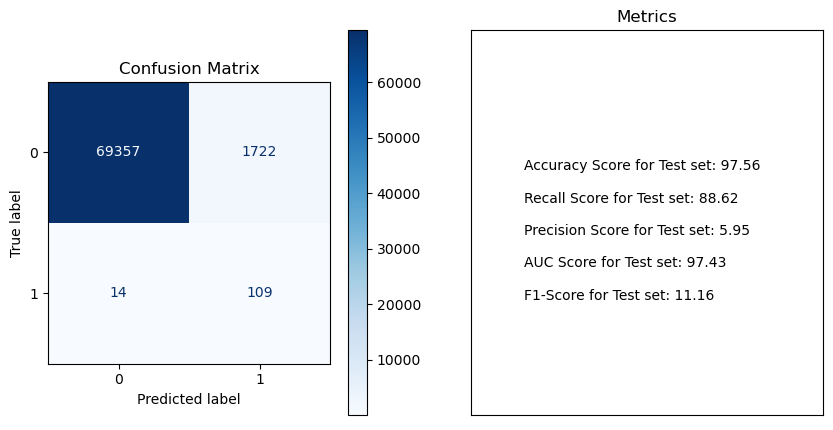

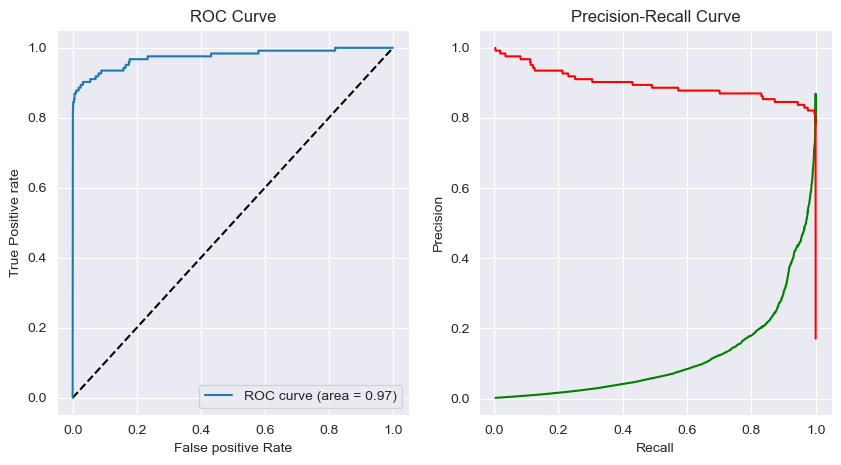

In [63]:
lg_ros = LogisticRegression(random_state=42, n_jobs=-1)

lg_ros.set_params(**log_model_ros.best_estimator_.get_params())

# fit and predict Logistic model
y_test_pred,test_pred_proba,lg_model_ros= fit_predict(lg_ros,hyperparameters,val_test=True,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,mode='ros')

# plot a confusion matirx for model 
confusion_matrix_plot(lg_model_ros,True,mode='ros')

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression ROS",True,mode="ros")

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## DECISION TREE

In [64]:
#create an instance of decisiontree
dec_tree_ros=DecisionTreeClassifier(random_state=42)

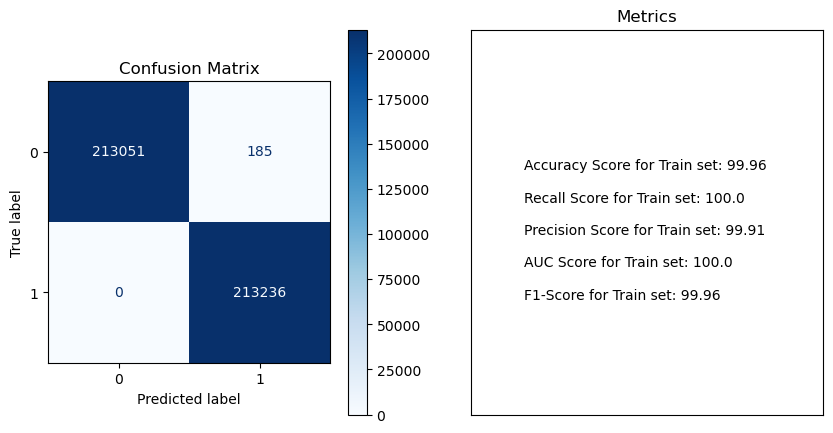

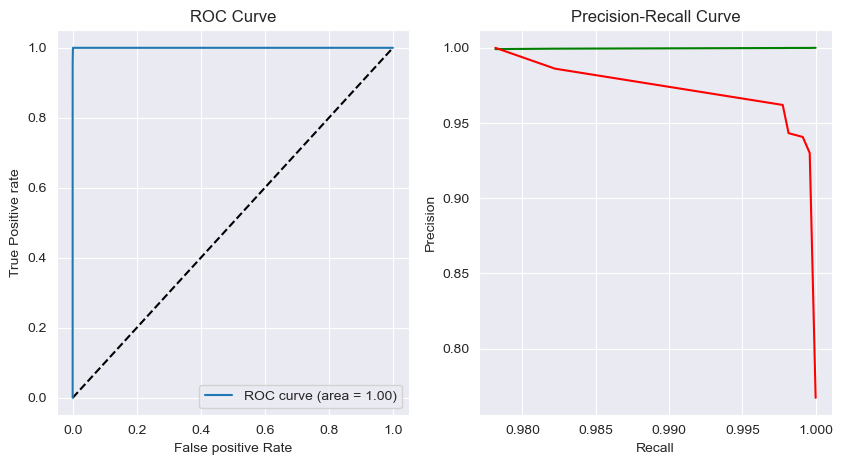

Wall time: 11.2 s


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [65]:
%%time

# fit and predict Decision Tree model
y_train_pred,train_pred_proba,dec_tree_model_ros= fit_predict(dec_tree_ros,hyperparameters_dec,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ros')

# plot a confusion matirx for model 
confusion_matrix_plot(dec_tree_model_ros,mode='ros')

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree ROS",mode='ros')

dec_tree_model_ros.best_estimator_.get_params()

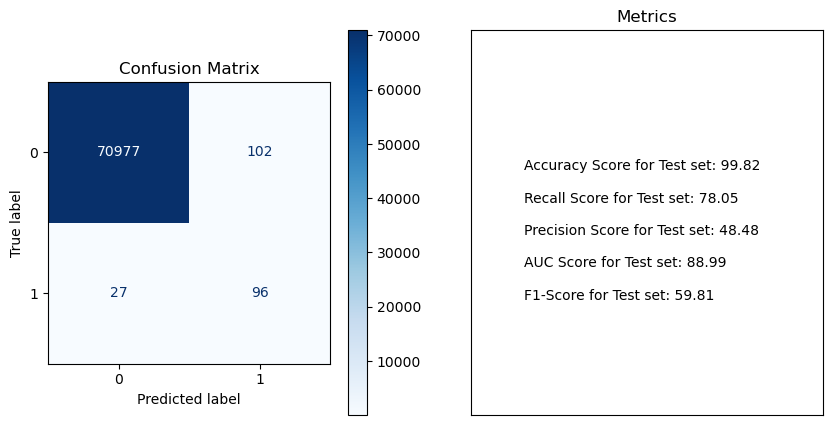

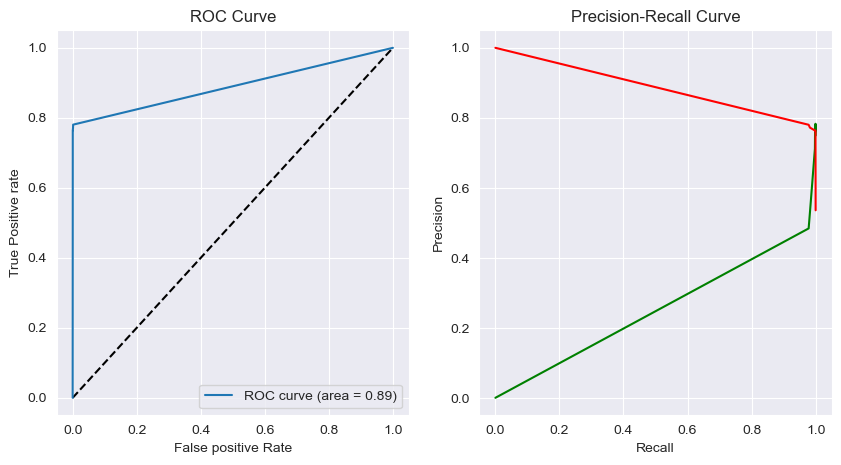

In [66]:
#create an instance of decisiontree
tree_ros=DecisionTreeClassifier(random_state=42)

tree_ros.set_params(**dec_tree_model_ros.best_estimator_.get_params())

# fit and predict Decision Tree model
y_test_pred,test_pred_proba,tree_model_ros= fit_predict(tree_ros,hyperparameters,val_test=True,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,mode="ros")

# plot a confusion matirx for model 
confusion_matrix_plot(tree_model_ros,True,mode="ros")

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree ROS",True,"ros")

## RANDOM FOREST

In [67]:
#create an instance of randomforest
randm_frst_ros=RandomForestClassifier(bootstrap=False,random_state=42,n_jobs=-1)

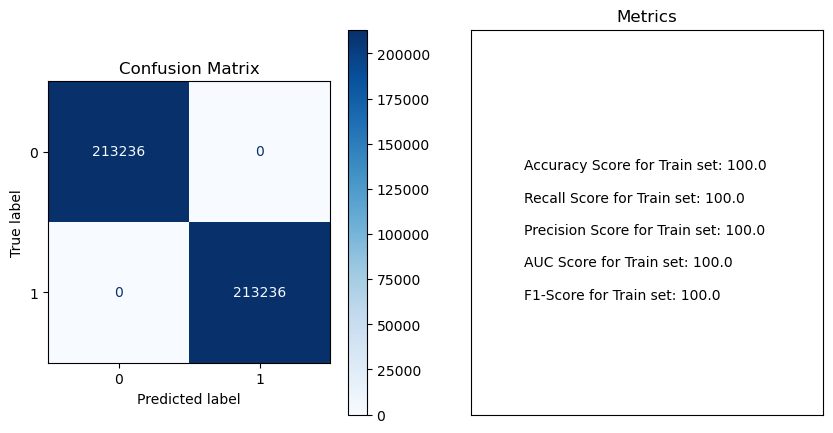

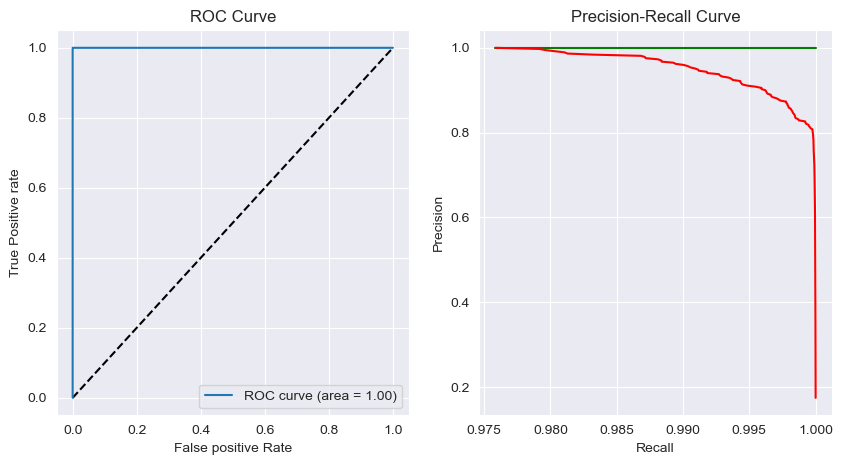

Wall time: 18min 27s


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
%%time

# fit and predict Random Forest model
y_train_pred,train_pred_proba,randm_frst_model_ros = fit_predict(randm_frst_ros,hyperparameters_fst,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ros')

# plot a confusion matirx for model 
confusion_matrix_plot(randm_frst_model_ros,mode='ros')

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest ROS",mode='ros')

randm_frst_model_ros.best_estimator_.get_params()

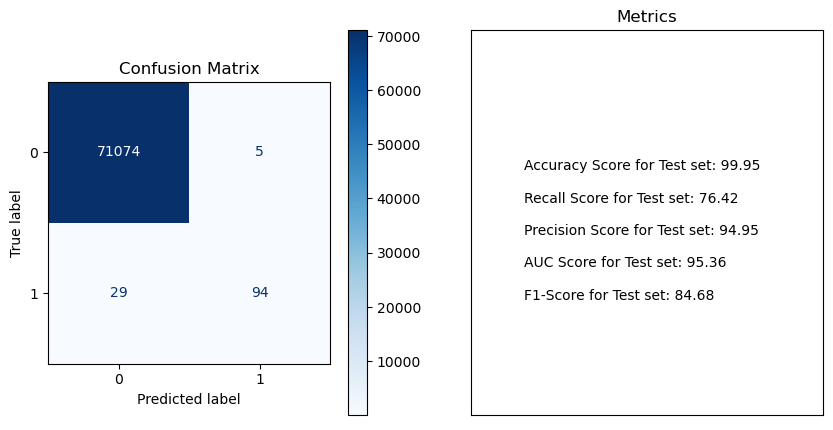

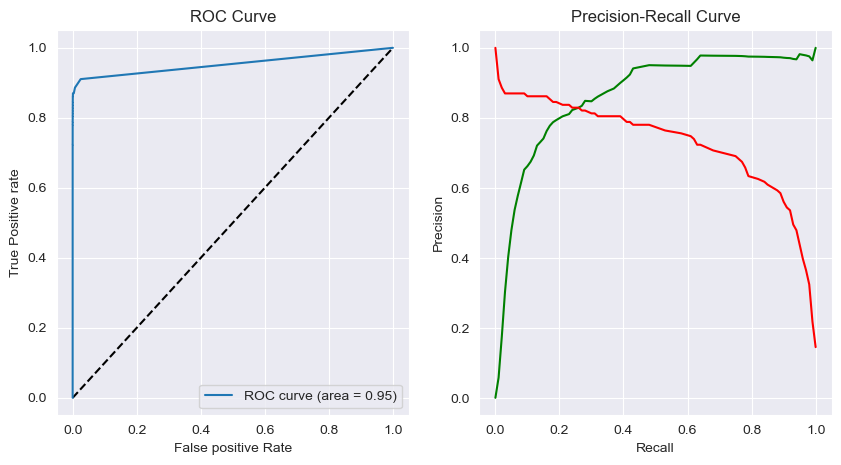

In [69]:
#create an instance of randomforest
forest_ros=RandomForestClassifier(random_state=42,n_jobs=-1)

forest.set_params(**randm_frst_model_ros.best_estimator_.get_params())

# fit and predict Random Forest model
y_test_pred,test_pred_proba,forest_model_ros= fit_predict(forest_ros,hyperparameters,val_test=True,mode="ros")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"ros")

# plot a confusion matirx for model 
confusion_matrix_plot(forest_model_ros,True,"ros")

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest ROS",True,"ros")

## XGBOOSTING

In [70]:
xg_bst_ros = XGBClassifier(random_state=42,n_jobs=-1)

[07:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


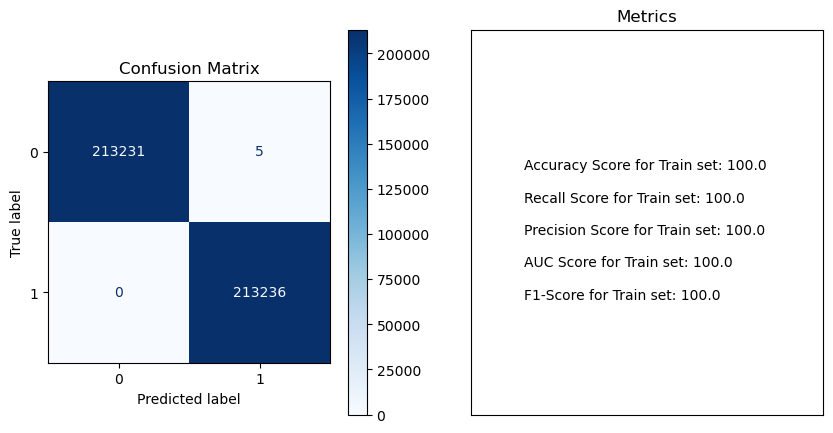

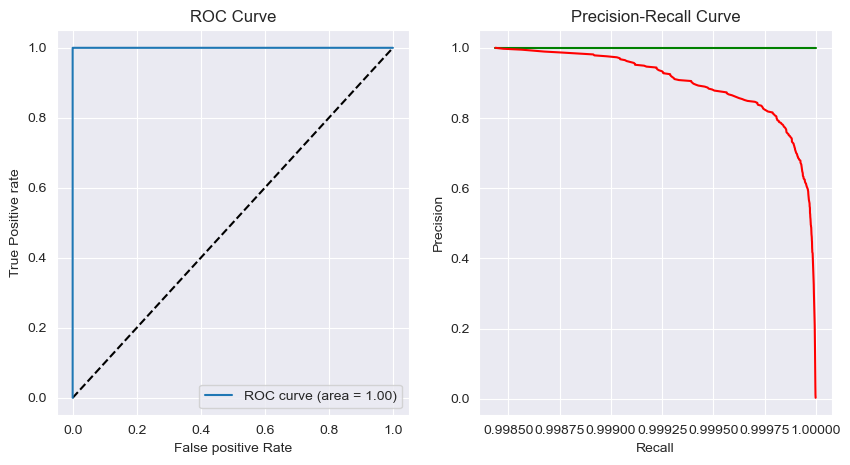

Wall time: 6min 35s


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.15,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.25,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 80,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [71]:
%%time

# fit and predict XGBoost model to dataset obtained through RFE
y_train_pred,train_pred_proba,xg_bst_model_ros = fit_predict(xg_bst_ros,hyperparameters_xgb,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ros')

# plot a confusion matirx for model 
confusion_matrix_plot(xg_bst_model_ros,mode='ros')

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost ROS",mode='ros')

xg_bst_model_ros.best_estimator_.get_params()

[07:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


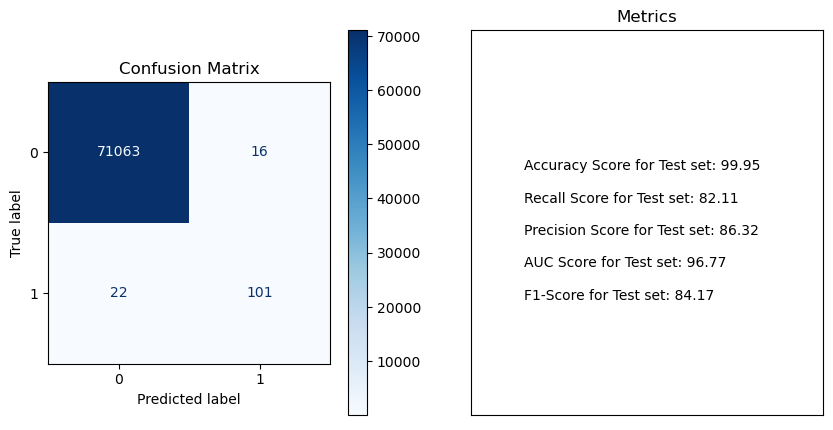

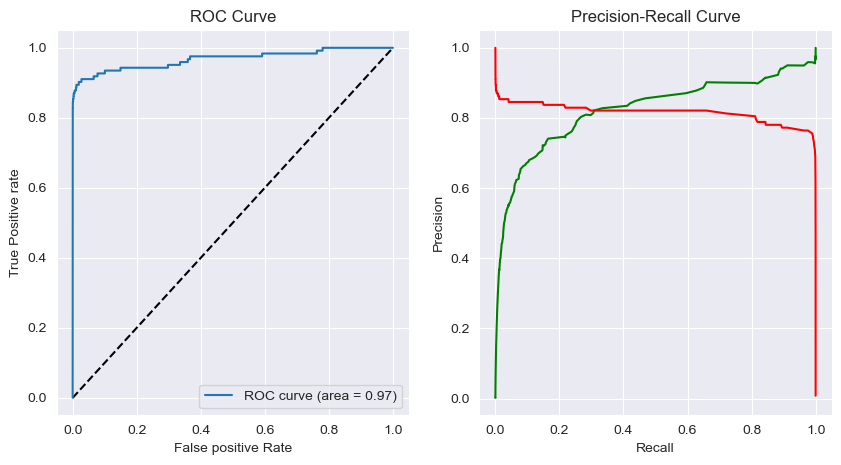

In [72]:
#create an instance of decisiontree
xgb_ros=XGBClassifier(random_state=42,n_jobs=-1)

xgb_ros.set_params(**xg_bst_model_ros.best_estimator_.get_params())

# fit and predict XGBoost model to dataset obtained through RFE
y_test_pred,test_pred_proba,xgb_model_ros = fit_predict(xgb_ros,hyperparameters,val_test=True,mode="ros")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"ros")

# plot a confusion matirx for model 
confusion_matrix_plot(xgb_model_ros,True,"ros")

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost ROS",True,"ros")

In [73]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T
model_summary_ros=model_summary[model_summary.index.str.contains('ROS')]
model_summary_ros.style.set_properties(
    subset=['Test ROC-AUC'], 
    **{'font-weight': 'bold'}
).highlight_max(subset=['Test Accuracy','Test Recall','Test Precision','Test ROC-AUC'], color = 'lightgreen',axis=0)

Top var = 14
2nd Top var = 4
3rd Top var = 12


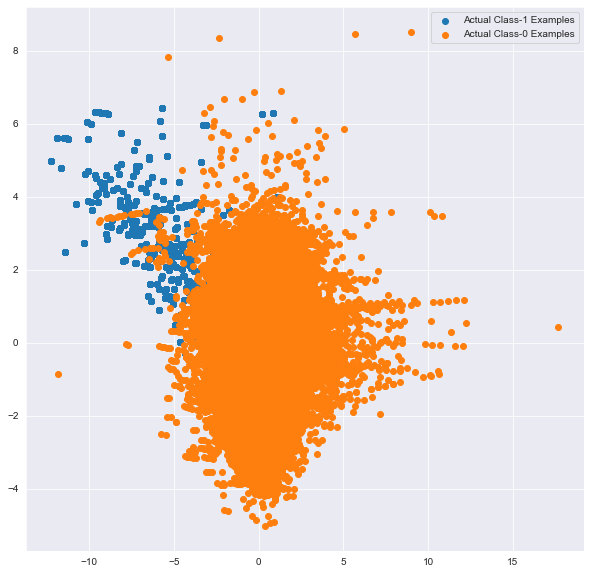

In [74]:
var_imp = []
for i in xgb_model_ros.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model_ros.feature_importances_)[-2])

X_train_1 = X_train_ros.to_numpy()[np.where(y_train_ros==1.0)]
X_train_0 = X_train_ros.to_numpy()[np.where(y_train_ros==0.0)]

np.random.shuffle(X_train_0)

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [75]:
#var_index = dict(tuple(zip(X_train_ros.columns,np.arange(0,len(X_train_ros.columns)))))

In [76]:
# top_var = list(tuple(zip(list(var_index.keys()),list(np.abs(lg_model_ros.coef_[0])))))
# top_var.sort(key=lambda a:a[1],reverse=True)
# sns.barplot(list(dict(top_var).keys()),list(dict(top_var).values()));

In [77]:
# print('Top var =', top_var[0][0])
# print('2nd Top var =', top_var[1][0])
# print('3rd Top var =', top_var[2][0])

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# np.random.shuffle(X_train_0)

# %matplotlib inline
# plt.rcParams['figure.figsize'] = [10, 10]

# plt.scatter(X_train_1[:, var_index[top_var[0][0]]], X_train_1[:, var_index[top_var[1][0]]], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], var_index[top_var[0][0]]], X_train_0[:X_train_1.shape[0], var_index[top_var[1][0]]],
#             label='Actual Class-0 Examples')
# plt.legend();

### Print the class distribution after applying SMOTE 

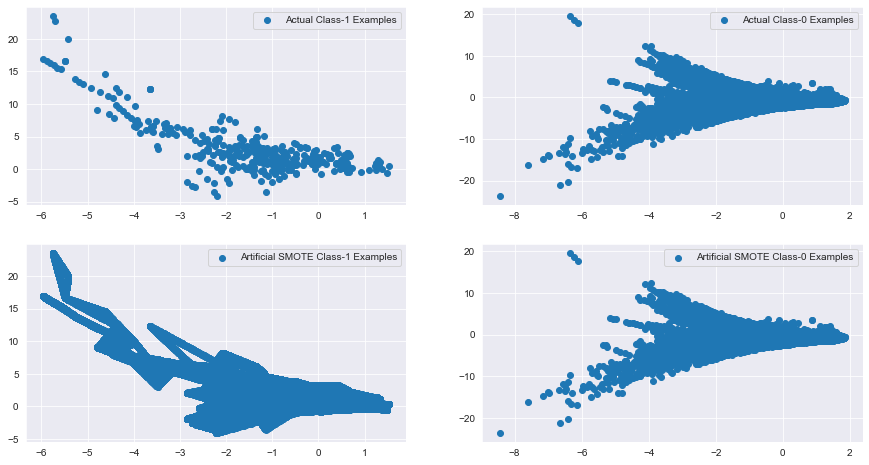

In [78]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
smote = SMOTE(random_state=5)
X_train_smt, y_train_smt = smote.fit_resample(X_train,y_train)

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_smote_1 = X_train_smt.to_numpy()[np.where(y_train_smt==1.0)]
X_train_smote_0 = X_train_smt.to_numpy()[np.where(y_train_smt==0.0)]

plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_train_smote_1[:, 0], X_train_smote_1[:, 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_train_smote_0[:, 0], X_train_smote_0[:, 1],label='Artificial SMOTE Class-0 Examples')
plt.legend()

plt.show()

##### Build models on other algorithms to see the better performing on SMOTE

## Logistic regression

In [79]:
#create an instance of linear regression
log_reg_smt=LogisticRegression(random_state=42,n_jobs=-1)

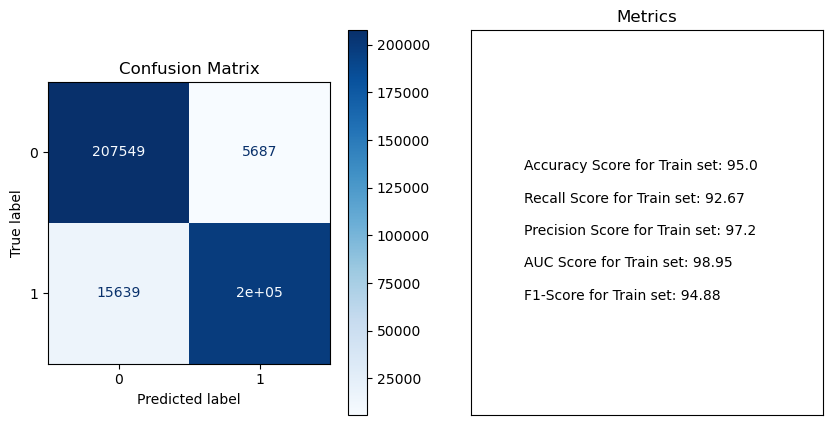

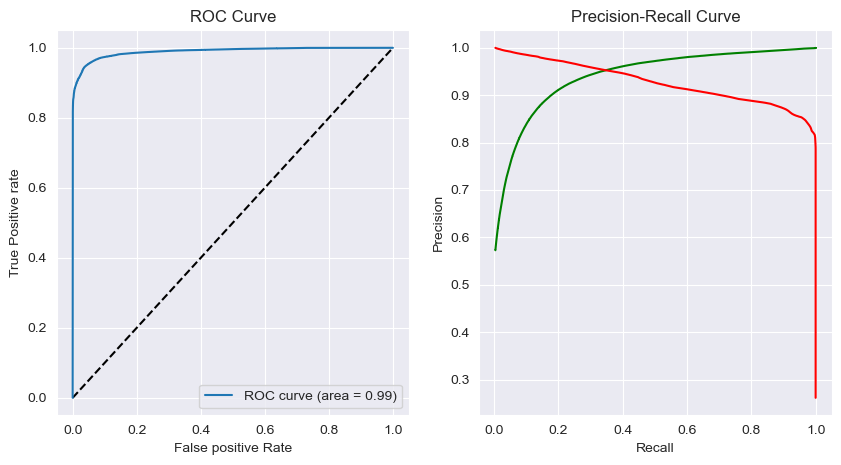

Wall time: 5min 35s


{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [80]:
%%time

# fit and predict Logistic model
y_train_pred,train_pred_proba,log_model_smt= fit_predict(log_reg_smt,hyperparameters_log,mode='smt')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='smt')

# plot a confusion matirx for model 
confusion_matrix_plot(log_model_smt,mode='smt')

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression SMT",mode='smt')

log_model_smt.best_estimator_.get_params()

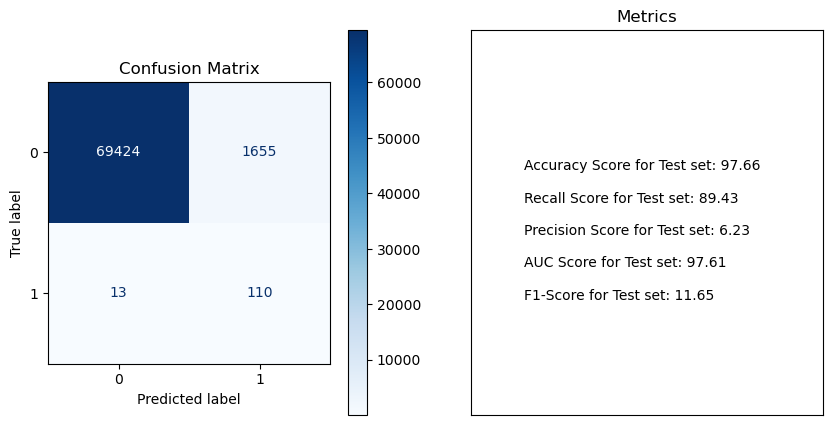

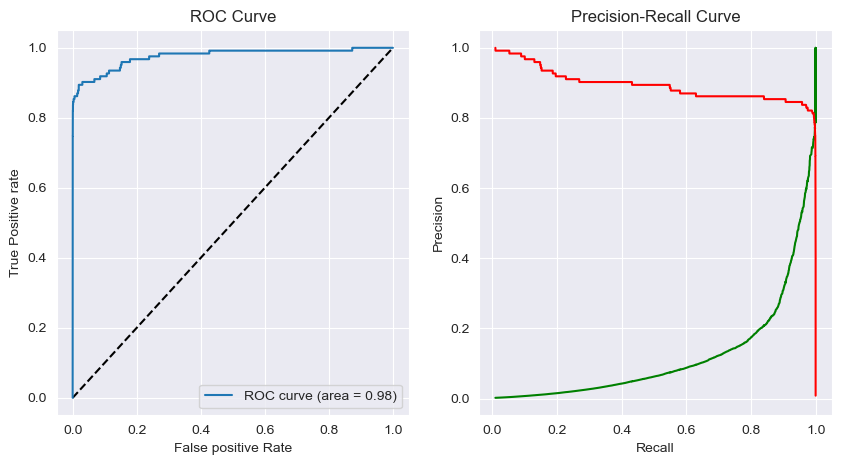

In [81]:
lg_smt = LogisticRegression(random_state=42, n_jobs=-1)

lg_smt.set_params(**log_model.best_estimator_.get_params())

# fit and predict Logistic model
y_test_pred,test_pred_proba,lg_model_smt= fit_predict(lg_smt,hyperparameters,val_test=True,mode='smt')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,mode='smt')

# plot a confusion matirx for model 
confusion_matrix_plot(lg_model_smt,True,mode='smt')

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression SMT",True,"smt")

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## DECISION TREE

In [82]:
#create an instance of decisiontree
dec_tree_smt=DecisionTreeClassifier(random_state=42)

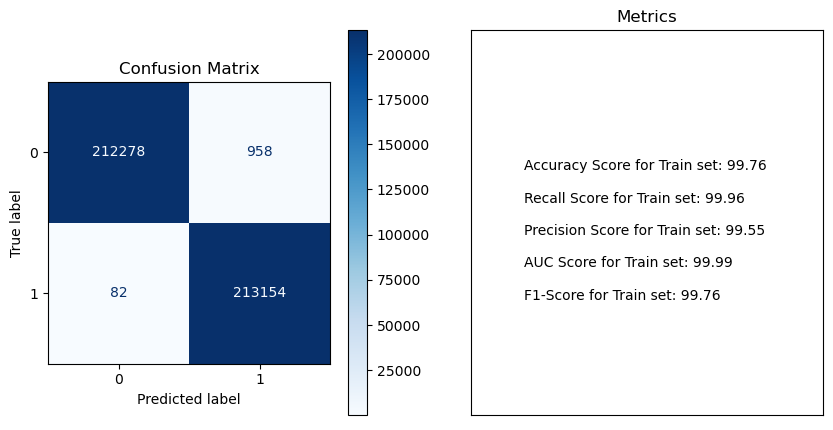

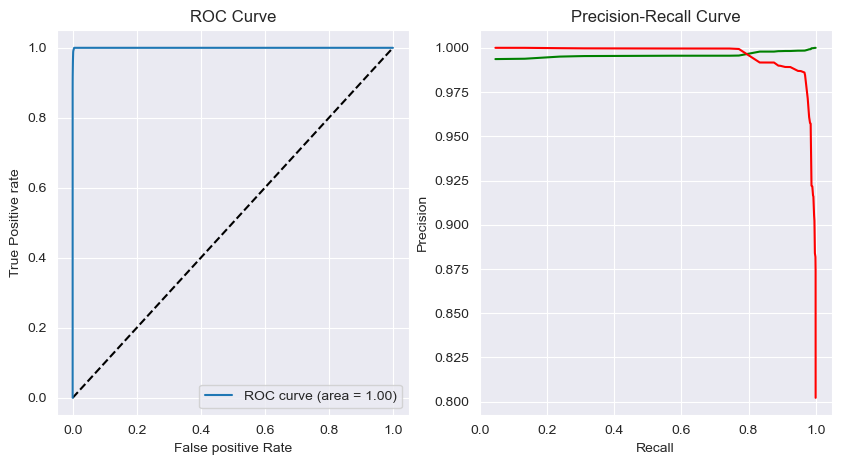

Wall time: 21.7 s


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [83]:
%%time

# fit and predict Decision Tree model
y_train_pred,train_pred_proba,dec_tree_model_smt= fit_predict(dec_tree_smt,hyperparameters_dec,mode='smt')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='smt')

# plot a confusion matirx for model 
confusion_matrix_plot(dec_tree_model_smt,mode='smt')

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree SMT",mode='smt')

dec_tree_model_smt.best_estimator_.get_params()

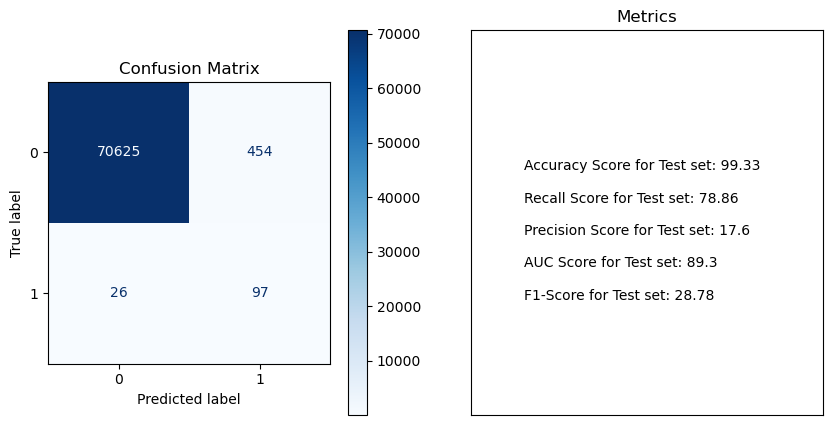

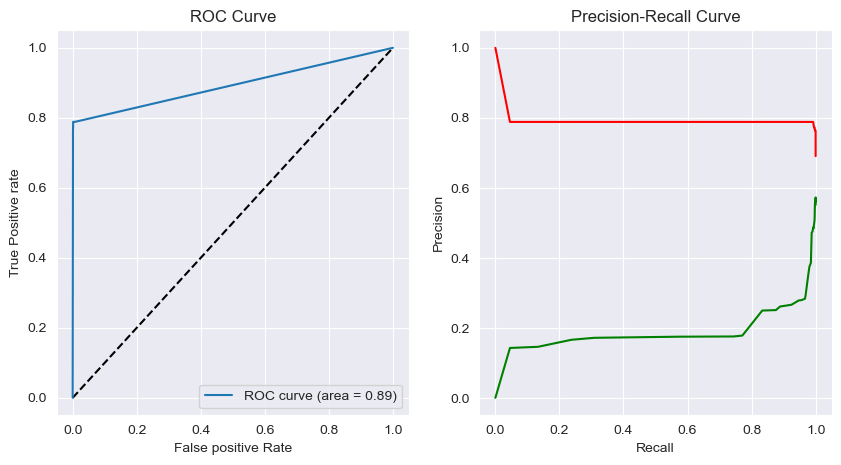

In [84]:
#create an instance of decisiontree
tree_smt=DecisionTreeClassifier(random_state=42)

tree_smt.set_params(**dec_tree_model_smt.best_estimator_.get_params())

# fit and predict Decision Tree model
y_test_pred,test_pred_proba,tree_model_smt= fit_predict(tree_smt,hyperparameters,True,mode='smt')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"smt")

# plot a confusion matirx for model 
confusion_matrix_plot(tree_model_smt,True,"smt")

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree SMT",True,"smt")

## RANDOM FOREST

In [85]:
#create an instance of randomforest
randm_frst_smt=RandomForestClassifier(bootstrap=False,random_state=42,n_jobs=-1)

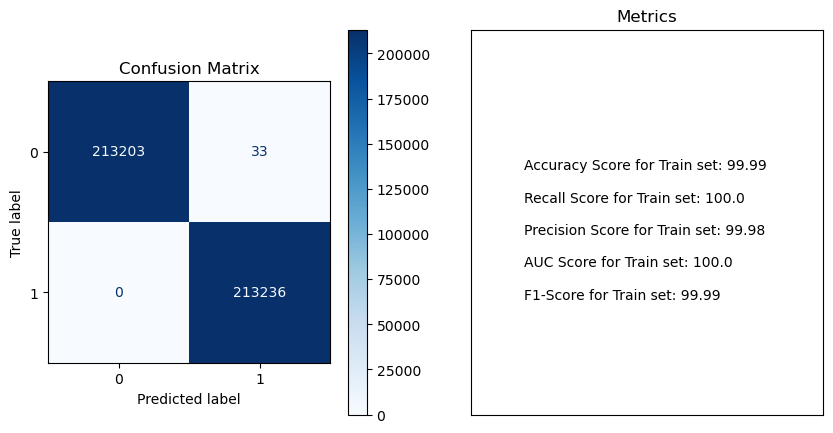

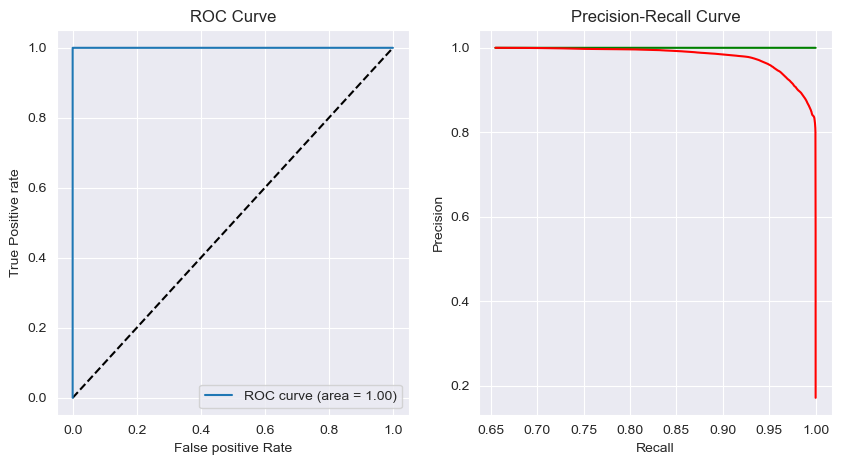

Wall time: 33min 18s


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [86]:
%%time

# fit and predict Random Forest model
y_train_pred,train_pred_proba,randm_frst_model_smt = fit_predict(randm_frst_smt,hyperparameters_fst,mode='smt')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='smt')

# plot a confusion matirx for model 
confusion_matrix_plot(randm_frst_model_smt,mode='smt')

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest SMT",mode='smt')

randm_frst_model_smt.best_estimator_.get_params()

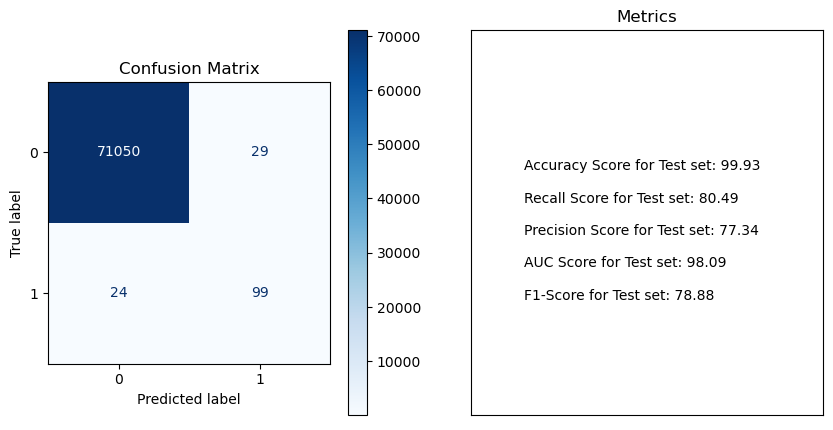

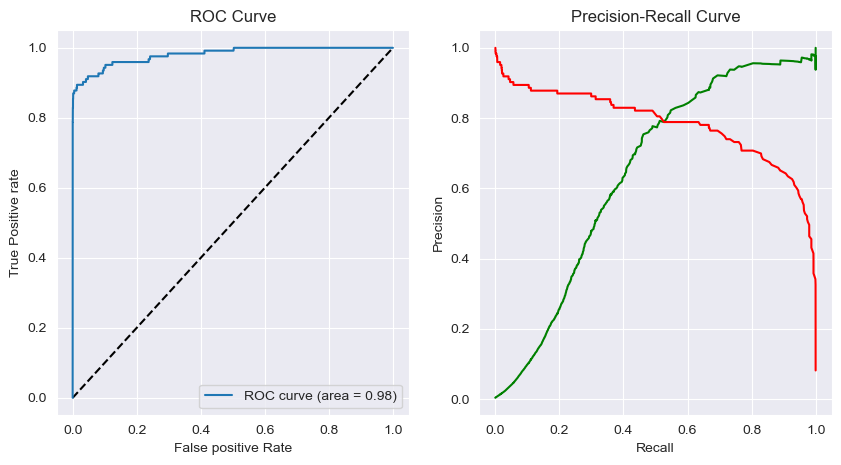

In [87]:
#create an instance of randomforest
forest_smt=RandomForestClassifier(random_state=42,n_jobs=-1)

forest_smt.set_params(**randm_frst_model_smt.best_estimator_.get_params())

# fit and predict Random Forest model
y_test_pred,test_pred_proba,forest_model_smt= fit_predict(forest_smt,hyperparameters,val_test=True,mode="smt")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"smt")

# plot a confusion matirx for model 
confusion_matrix_plot(forest_model_smt,True,"smt")

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest SMT",True,"smt")

## XGBOOSTING

In [88]:
xg_bst_smt = XGBClassifier(random_state=42,n_jobs=-1)

[08:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


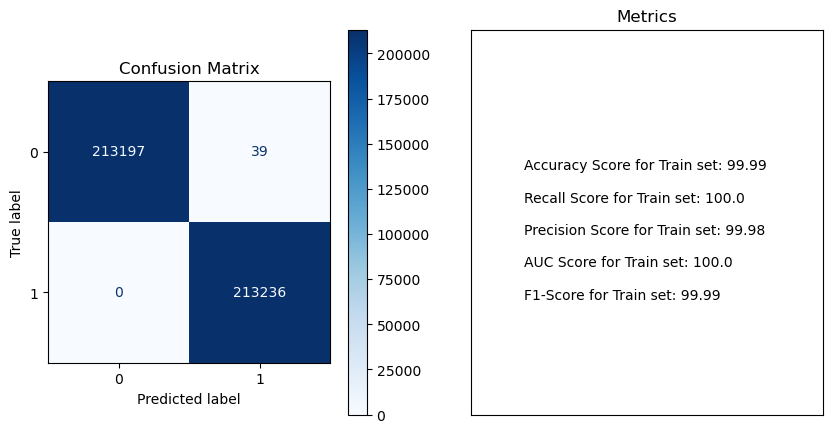

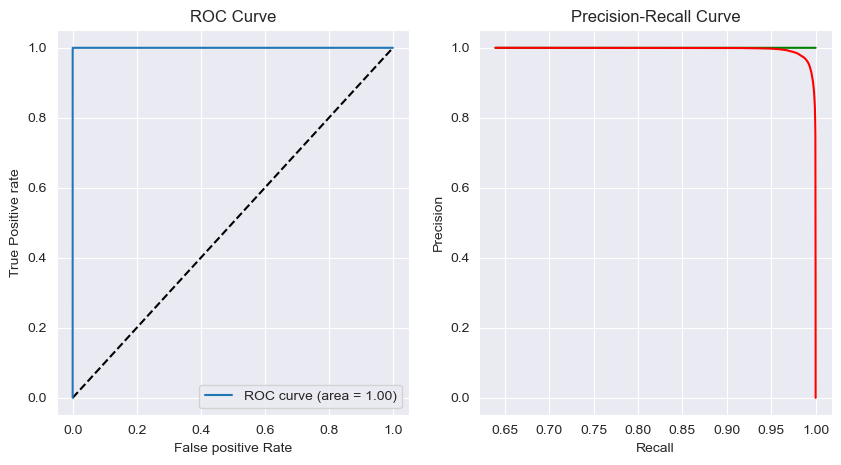

Wall time: 10min 30s


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.2,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.25,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 80,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [89]:
%%time

# fit and predict XGBoost model to dataset obtained through RFE
y_train_pred,train_pred_proba,xg_bst_model_smt = fit_predict(xg_bst_smt,hyperparameters_xgb,mode='smt')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='smt')

# plot a confusion matirx for model 
confusion_matrix_plot(xg_bst_model_smt,mode='smt')

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost SMT",mode='smt')

xg_bst_model_smt.best_estimator_.get_params()

[08:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


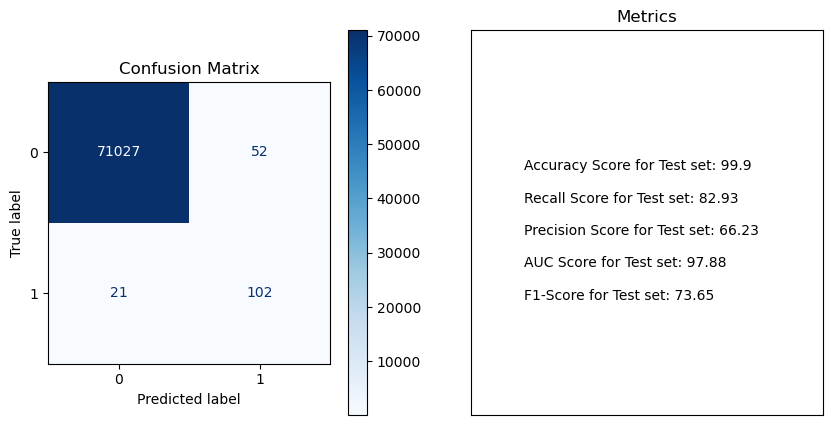

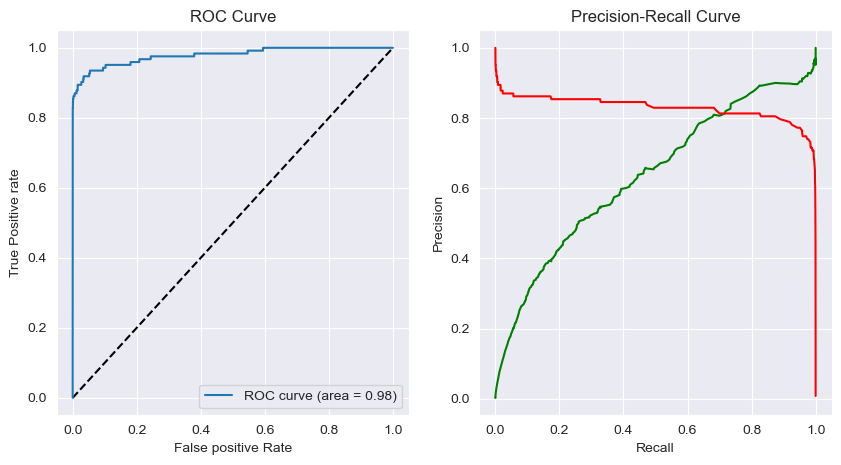

In [90]:
#create an instance of decisiontree
xgb_smt=XGBClassifier(random_state=42,n_jobs=-1)

xgb_smt.set_params(**xg_bst_model_smt.best_estimator_.get_params())

# fit and predict XGBoost model to dataset obtained through RFE
y_test_pred,test_pred_proba,xgb_model_smt = fit_predict(xgb_smt,hyperparameters,val_test=True,mode="smt")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"smt")

# plot a confusion matirx for model 
confusion_matrix_plot(xgb_model_smt,True,"smt")

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost SMT",True,"smt")

In [91]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T
model_summary_smt=model_summary[model_summary.index.str.contains('SMT')]
model_summary_smt.style.set_properties(
    subset=['Test ROC-AUC'], 
    **{'font-weight': 'bold'}
).highlight_max(subset=['Test Accuracy','Test Recall','Test Precision','Test ROC-AUC'], color = 'lightgreen',axis=0)

Top var = 14
2nd Top var = 12
3rd Top var = 4


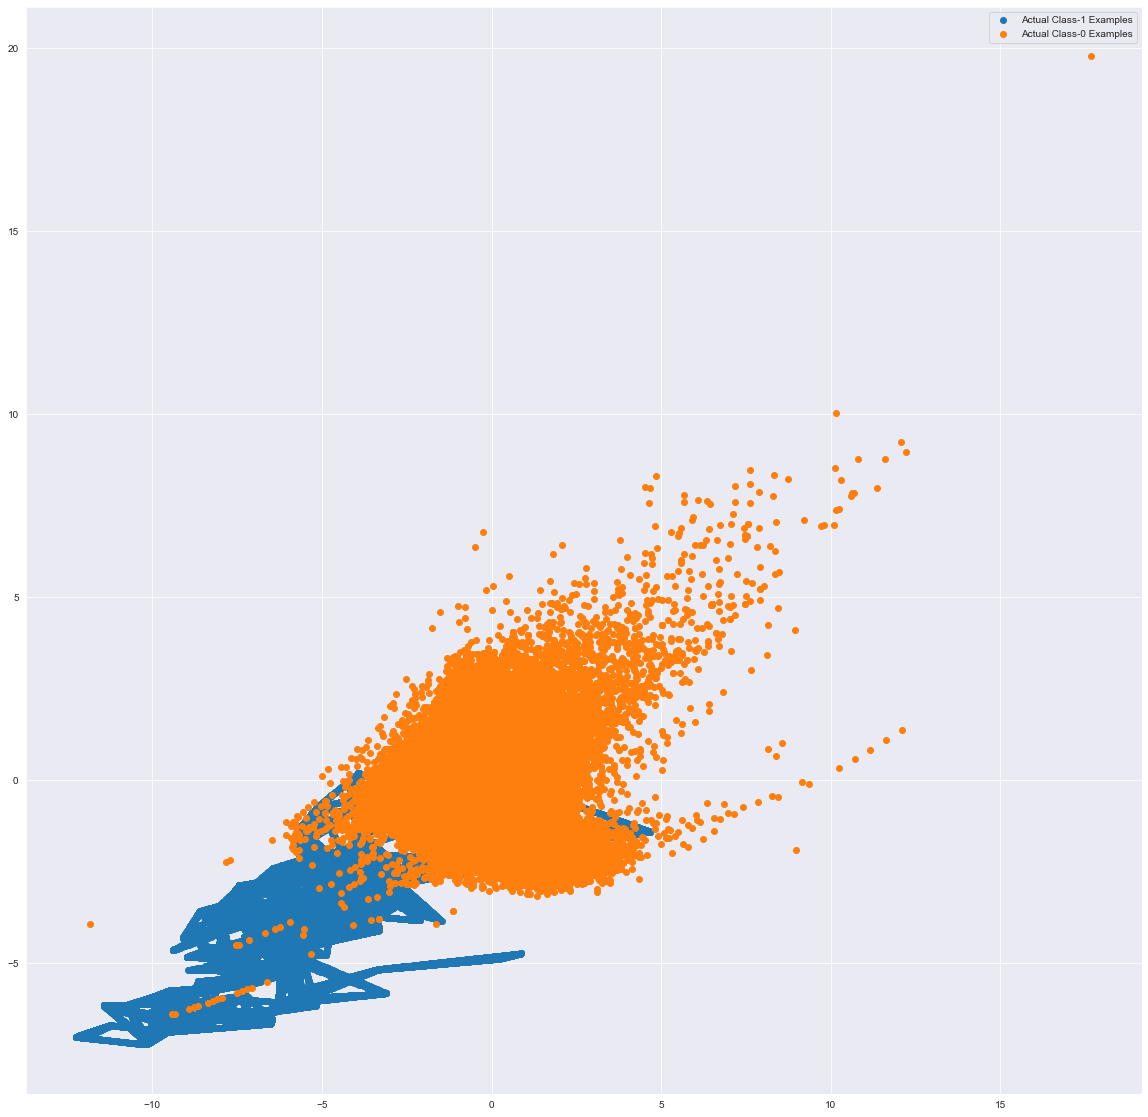

In [92]:
var_imp = []
for i in forest_model_smt.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(forest_model_smt.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(forest_model_smt.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(forest_model_smt.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(forest_model_smt.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(forest_model_smt.feature_importances_)[-2])

X_train_1 = X_train_smt.to_numpy()[np.where(y_train_smt==1.0)]
X_train_0 = X_train_smt.to_numpy()[np.where(y_train_smt==0.0)]

np.random.shuffle(X_train_0)

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying ADASYN

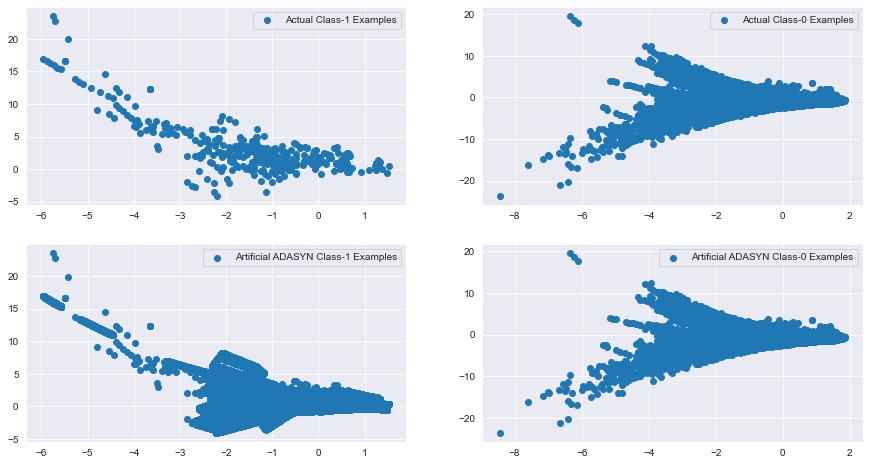

In [93]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=5)
X_train_ads, y_train_ads = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

X_train_ads_1 = X_train_ads.to_numpy()[np.where(y_train_ads==1.0)]
X_train_ads_0 = X_train_ads.to_numpy()[np.where(y_train_ads==0.0)]

plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_train_ads_1[:, 0], X_train_ads_1[:, 1],label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_train_ads_0[:, 0], X_train_ads_0[:, 1],label='Artificial ADASYN Class-0 Examples')
plt.legend()

plt.show()

## Logistic regression

In [94]:
#create an instance of linear regression
log_reg_ads=LogisticRegression(random_state=42,n_jobs=-1)

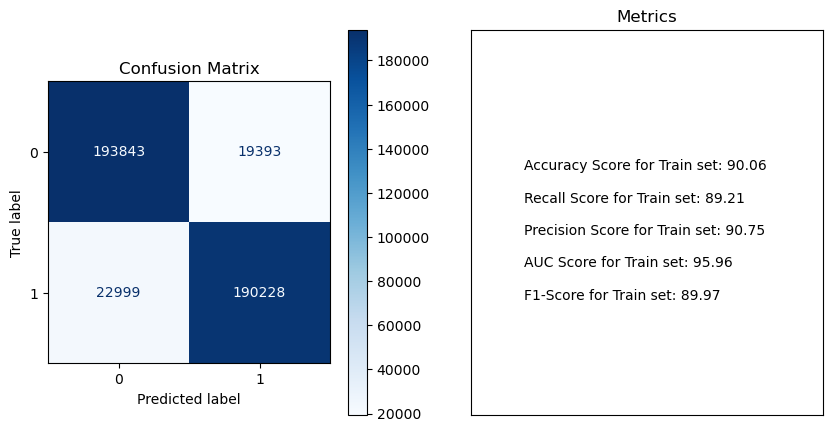

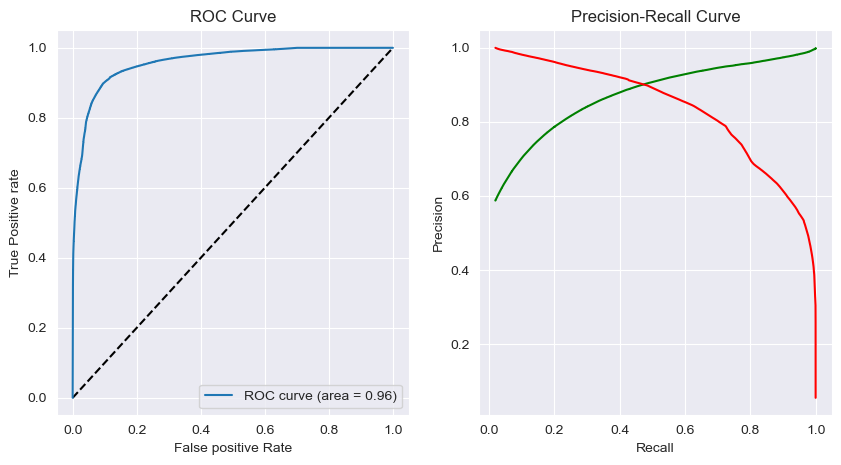

Wall time: 6min 27s


{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [95]:
%%time

# fit and predict Logistic model
y_train_pred,train_pred_proba,log_model_ads= fit_predict(log_reg_ads,hyperparameters_log,mode='ads')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ads')

# plot a confusion matirx for model 
confusion_matrix_plot(log_model_ads,mode='ads')

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression ADSN",mode='ads')

log_model_ads.best_estimator_.get_params()

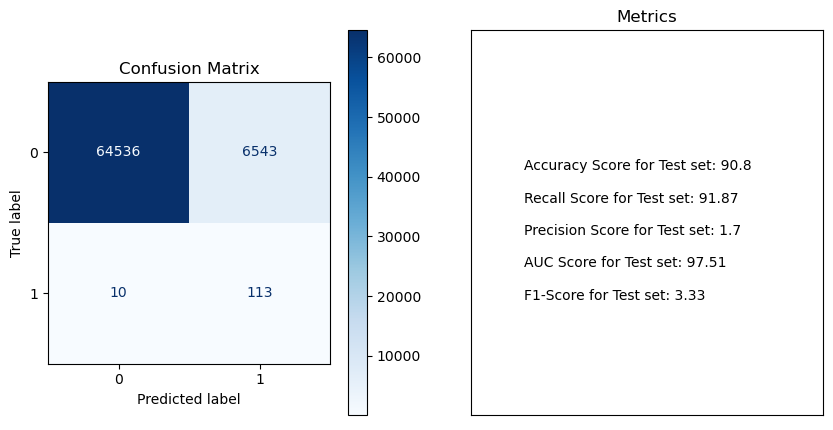

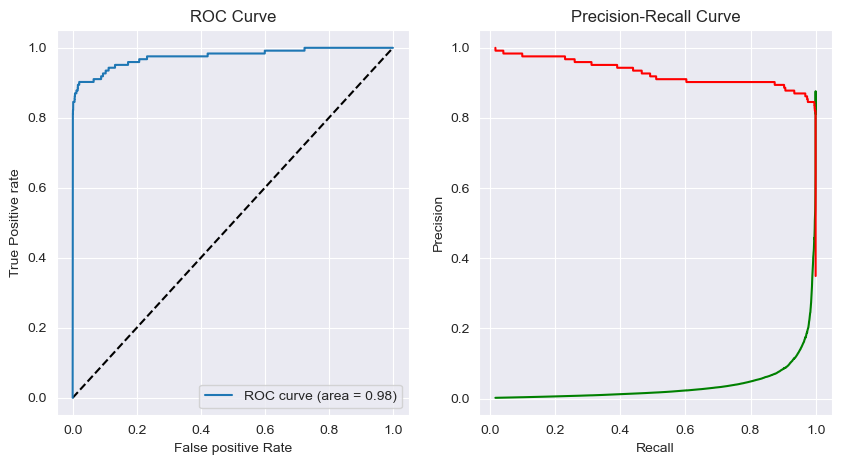

In [96]:
lg_ads = LogisticRegression(random_state=42, n_jobs=-1)

lg_ads.set_params(**log_model_ads.best_estimator_.get_params())

# fit and predict Logistic model
y_test_pred,test_pred_proba,lg_model_ads= fit_predict(lg_ads,hyperparameters,val_test=True,mode='ads')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,mode='ads')

# plot a confusion matirx for model 
confusion_matrix_plot(lg_model_ads,True,mode='ads')

# plot a ROC cure and Precision-recall curve for the Logistic Model
roc_curve_prec_curve("Logistic Regression ADSN",True,"ads")

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## DECISION TREE

In [97]:
#create an instance of decisiontree
dec_tree_ads=DecisionTreeClassifier(random_state=42)

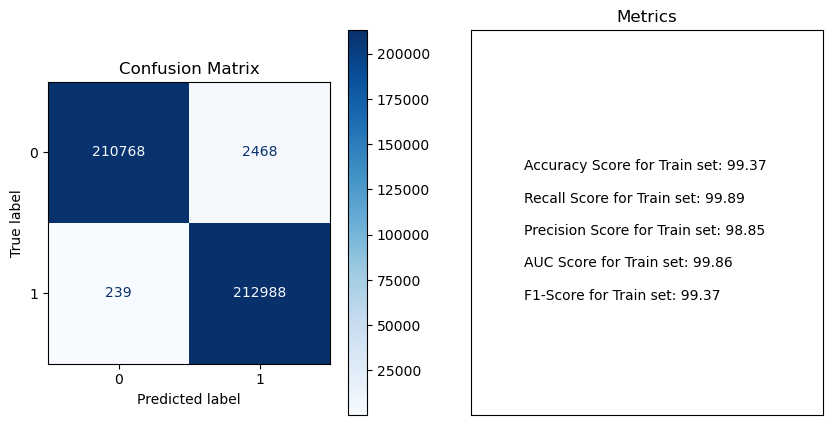

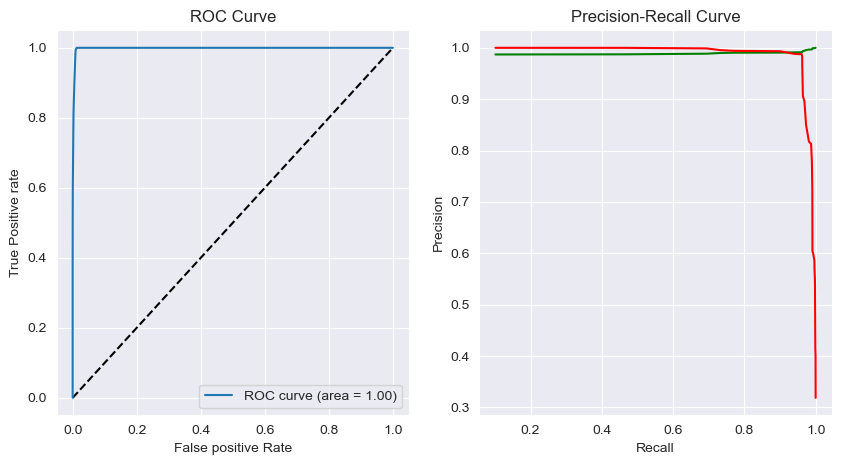

Wall time: 22.3 s


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [98]:
%%time

# fit and predict Decision Tree model
y_train_pred,train_pred_proba,dec_tree_model_ads= fit_predict(dec_tree_ads,hyperparameters_dec,mode='ads')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ads')

# plot a confusion matirx for model 
confusion_matrix_plot(dec_tree_model_ads,mode='ads')

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree ADSN",mode='ads')

dec_tree_model_ads.best_estimator_.get_params()

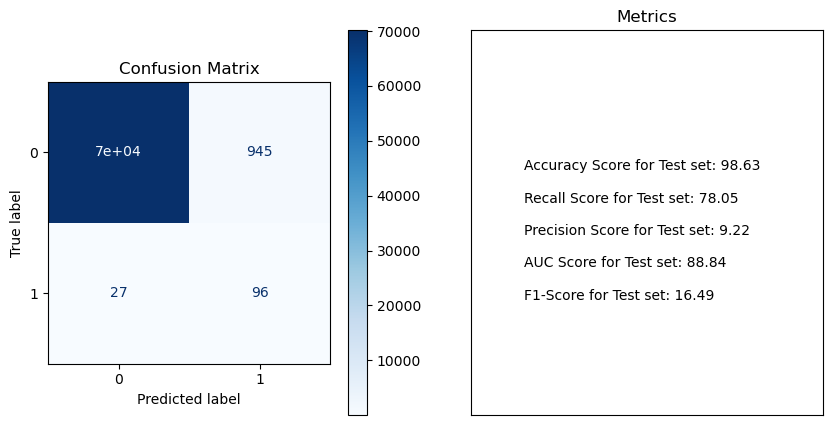

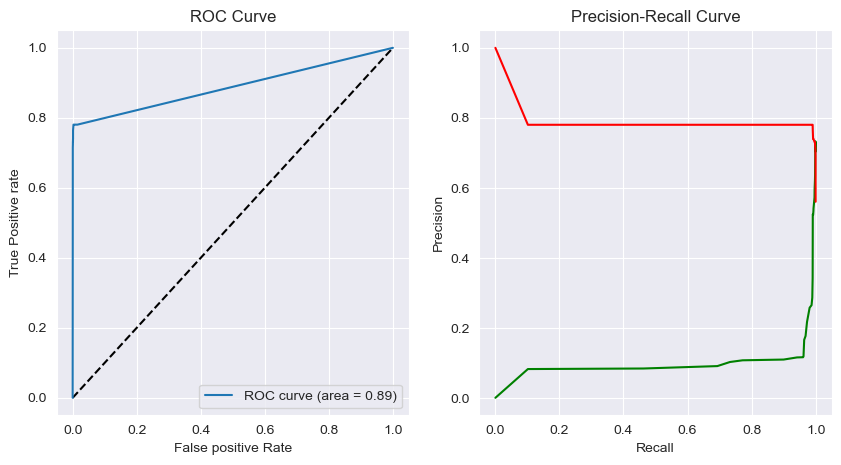

In [99]:
#create an instance of decisiontree
tree_ads=DecisionTreeClassifier(random_state=42)

tree_ads.set_params(**dec_tree_model_ads.best_estimator_.get_params())

# fit and predict Decision Tree model
y_test_pred,test_pred_proba,tree_model_ads= fit_predict(tree_ads,hyperparameters,True,mode='ads')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"ads")

# plot a confusion matirx for model 
confusion_matrix_plot(tree_model_ads,True,"ads")

# plot a ROC cure and Precision-recall curve for the Decision Tree Model
roc_curve_prec_curve("Decision Tree ADSN",True,"ads")

## RANDOM FOREST

In [100]:
#create an instance of randomforest
randm_frst_ads=RandomForestClassifier(bootstrap=False,random_state=42,n_jobs=-1)

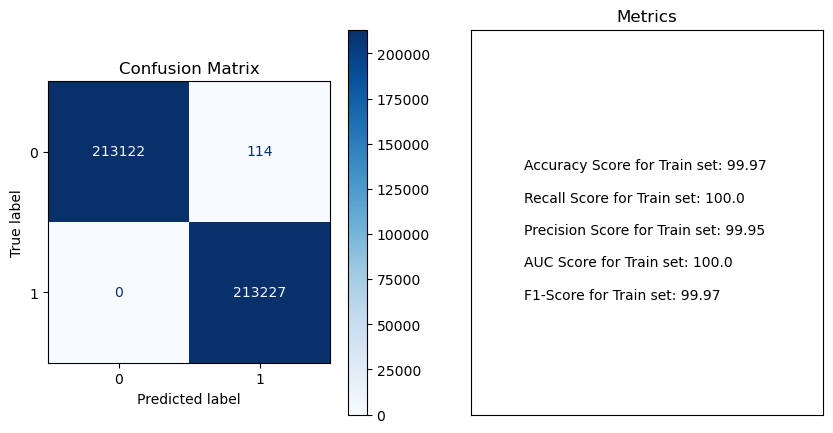

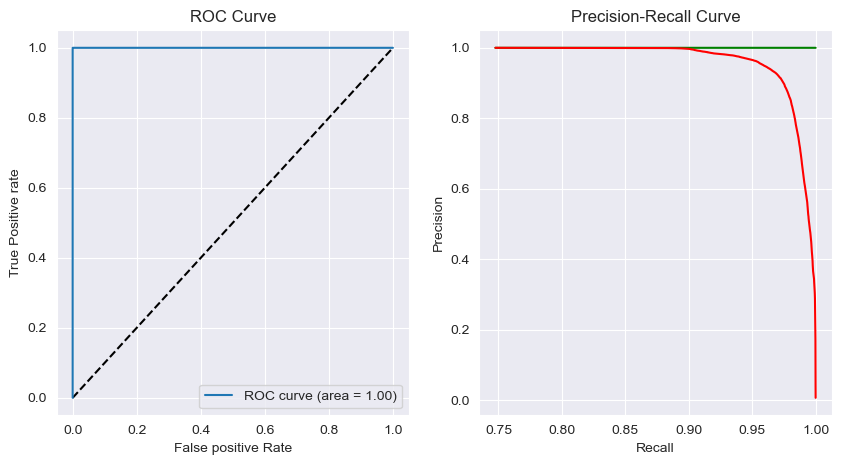

Wall time: 30min 33s


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [101]:
%%time

# fit and predict Random Forest model
y_train_pred,train_pred_proba,randm_frst_model_ads = fit_predict(randm_frst_ads,hyperparameters_fst,mode='ads')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ads')

# plot a confusion matirx for model 
confusion_matrix_plot(randm_frst_model_ads,mode='ads')

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest ADSN",mode='ads')

randm_frst_model_ads.best_estimator_.get_params()

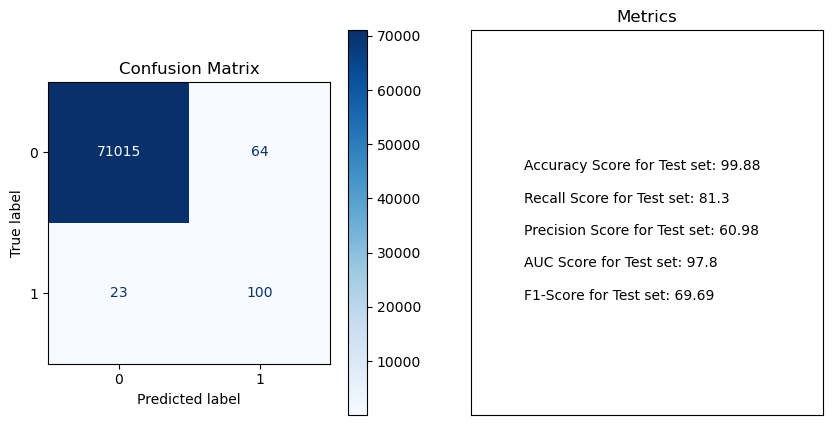

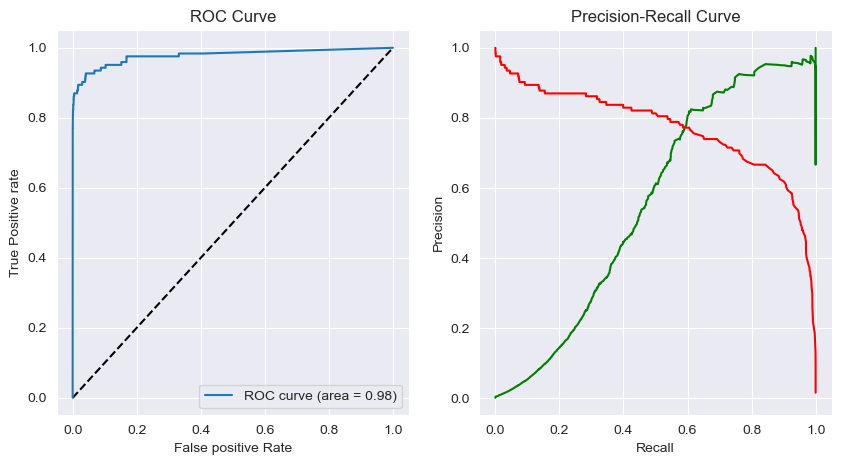

In [102]:
#create an instance of randomforest
forest_ads=RandomForestClassifier(random_state=42,n_jobs=-1)

forest_ads.set_params(**randm_frst_model_ads.best_estimator_.get_params())

# fit and predict Random Forest model
y_test_pred,test_pred_proba,forest_model_ads= fit_predict(forest_ads,hyperparameters,val_test=True,mode="ads")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"ads")

# plot a confusion matirx for model 
confusion_matrix_plot(forest_model_ads,True,"ads")

# plot a ROC cure and Precision-recall curve for the Random Forest Model
roc_curve_prec_curve("Random Forest ADSN",True,"ads")

## XGBOOSTING

In [103]:
xg_bst_ads = XGBClassifier(random_state=42,n_jobs=-1)

[08:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


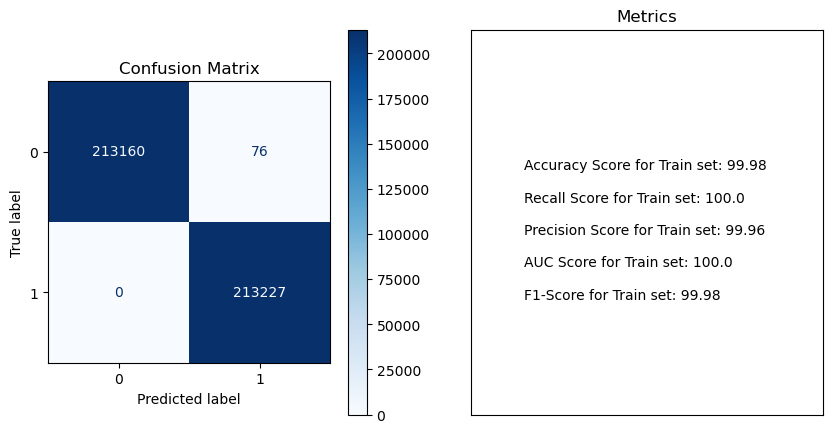

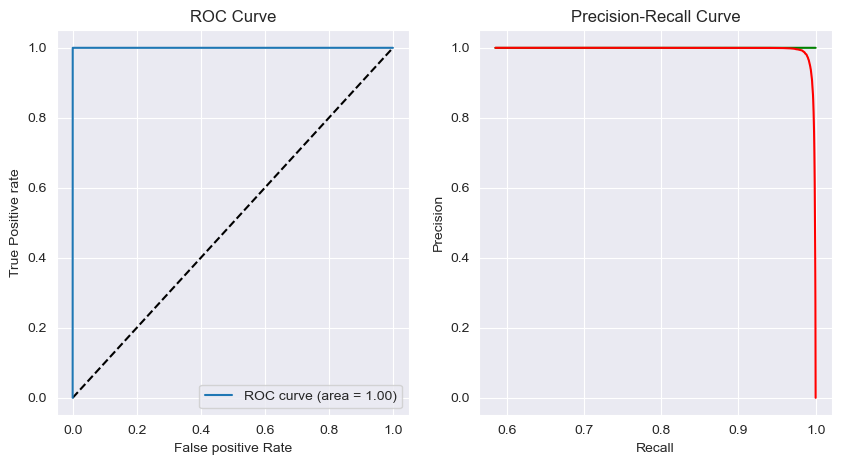

Wall time: 10min 36s


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.175,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.25,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 80,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [104]:
%%time

# fit and predict XGBoost model to dataset obtained through RFE
y_train_pred,train_pred_proba,xg_bst_model_ads = fit_predict(xg_bst_ads,hyperparameters_xgb,mode='ads')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ads')

# plot a confusion matirx for model 
confusion_matrix_plot(xg_bst_model_ads,mode='ads')

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost ADSN",mode='ads')

xg_bst_model_ads.best_estimator_.get_params()

[08:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


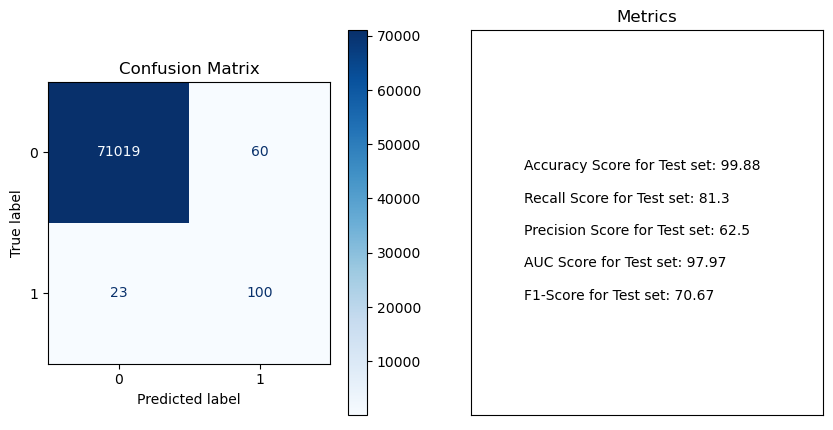

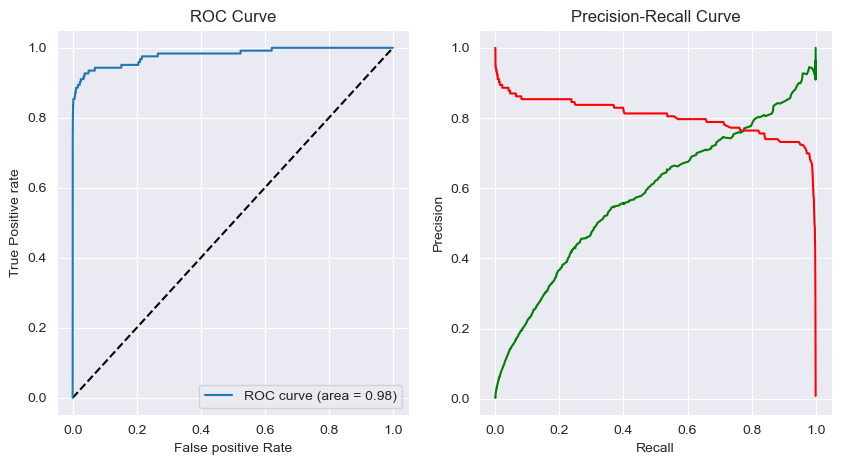

In [105]:
#create an instance of decisiontree
xgb_ads=XGBClassifier(random_state=42,n_jobs=-1)

xgb_ads.set_params(**xg_bst_model_ads.best_estimator_.get_params())

# fit and predict XGBoost model to dataset obtained through RFE
y_test_pred,test_pred_proba,xgb_model_ads = fit_predict(xgb_ads,hyperparameters,val_test=True,mode="ads")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"ads")

# plot a confusion matirx for model 
confusion_matrix_plot(xgb_model_ads,True,"ads")

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost ADSN",True,"ads")

In [106]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T
model_summary_ads=model_summary[model_summary.index.str.contains('ADSN')]
model_summary_ads.style.set_properties(
    subset=['Test ROC-AUC'], 
    **{'font-weight': 'bold'}
).highlight_max(subset=['Test ROC-AUC'], color = 'lightgreen',axis=0)

### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 14
3rd Top var = 8


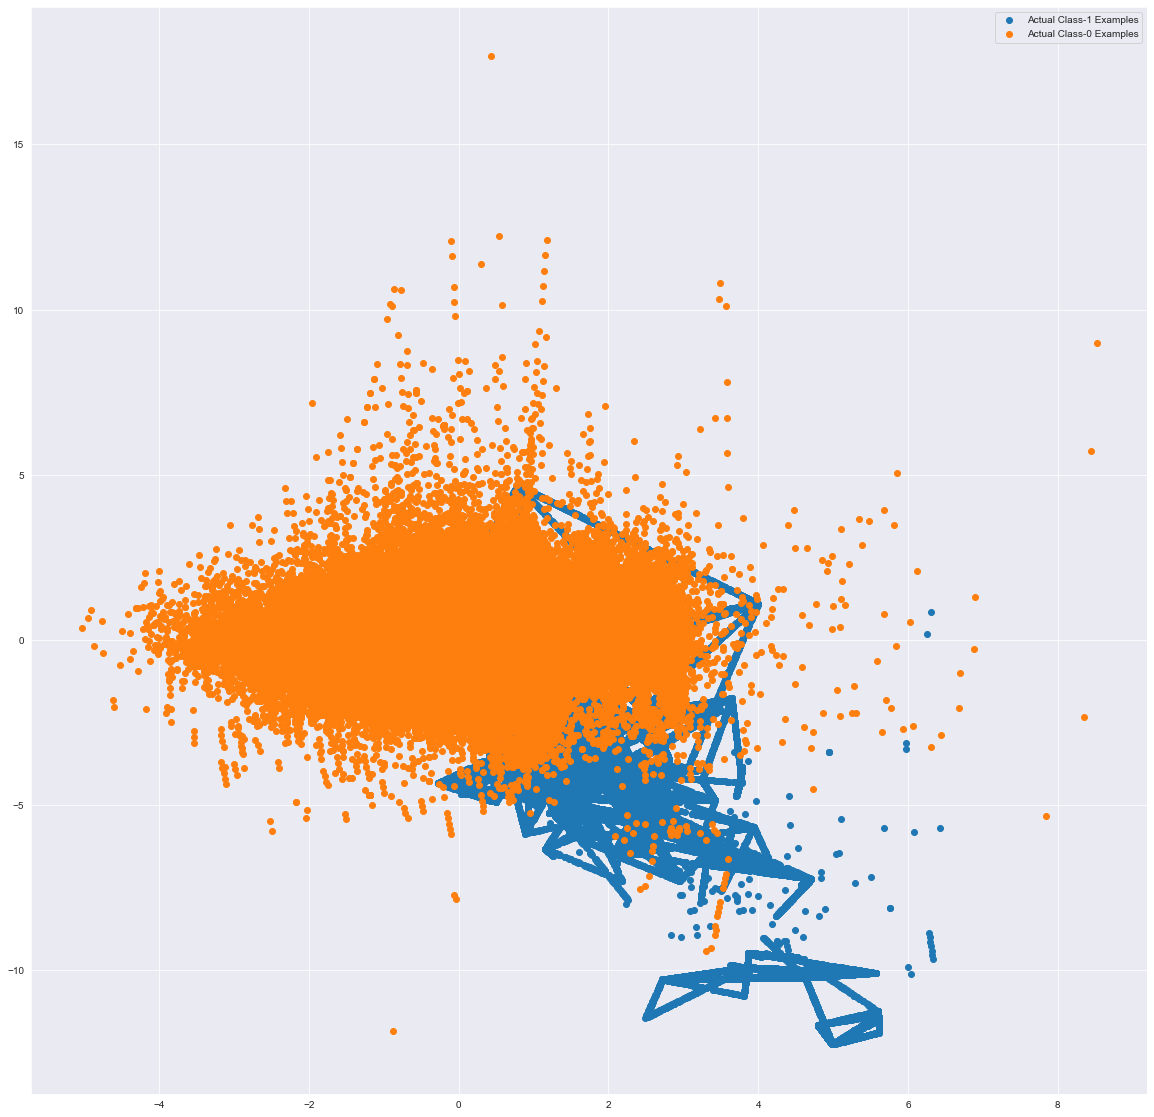

In [107]:
var_imp = []
for i in xgb_model_ads.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model_ads.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model_ads.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model_ads.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model_ads.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model_ads.feature_importances_)[-2])

X_train_1 = X_train_ads.to_numpy()[np.where(y_train_ads==1.0)]
X_train_0 = X_train_ads.to_numpy()[np.where(y_train_ads==0.0)]

np.random.shuffle(X_train_0)

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend();

In [108]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T
model_summary.style.highlight_max(subset=['Train Accuracy','Train Recall','Train Precision','Train ROC-AUC','Train F1-Score',\
                                          'Train threshold','Test Accuracy','Test Recall','Test Precision','Test ROC-AUC','Test F1-Score','Test threshold'], color = 'lightgreen',axis=0)

### Selecting the Overall Best Model

The overall best model that has a good score in Train and Test dataset is XGB Model on Random over sampled dataset. Random FOrest ROS also performes well but has a lesser test Recall score.

Since XGB on Random Over sampling performed well than all other models lets take this as our final model.

## XG BOOST as final model with Random Over Sampled data

In [109]:
xg_bst_model_ros.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.15,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.25,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 80,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### As we can see the best estimator params of our XGB ROS model. Lets add more hyperparams to see if it can provide better results than the selected model

In [110]:
hyperparameters_xgb = {  "learning_rate"    : [0.10,0.15,0.2,0.25,0.3],
                     "n_estimators"    : [40,60,80,100],
                       "max_depth" : [4,6,8,10]
                  }

[09:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


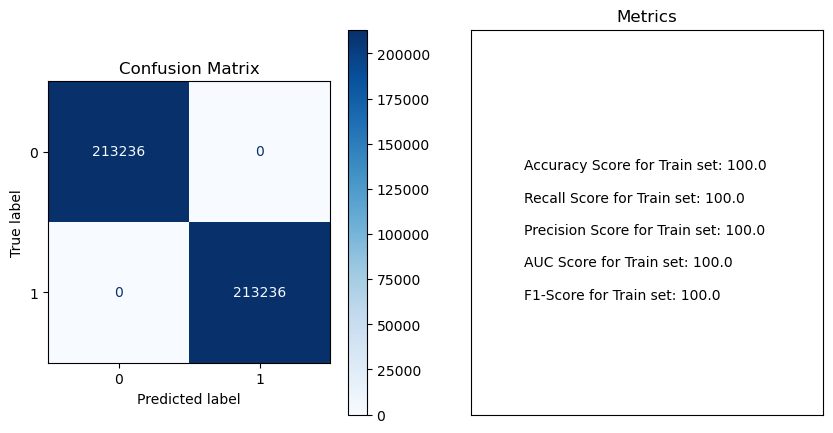

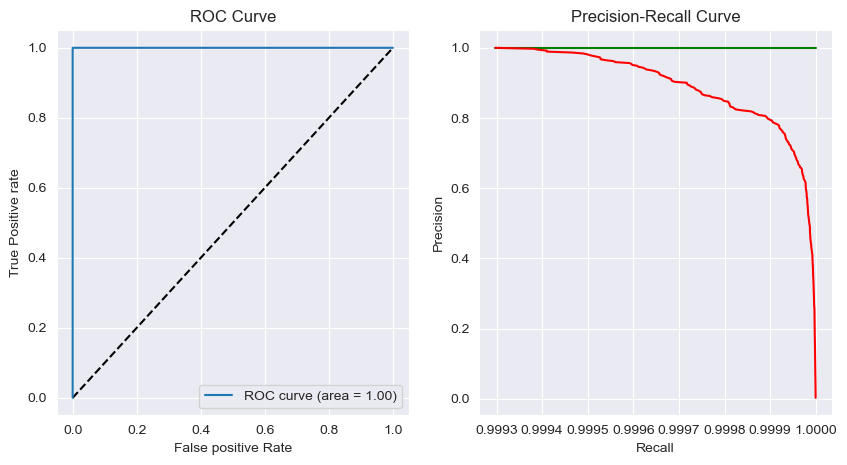

[09:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


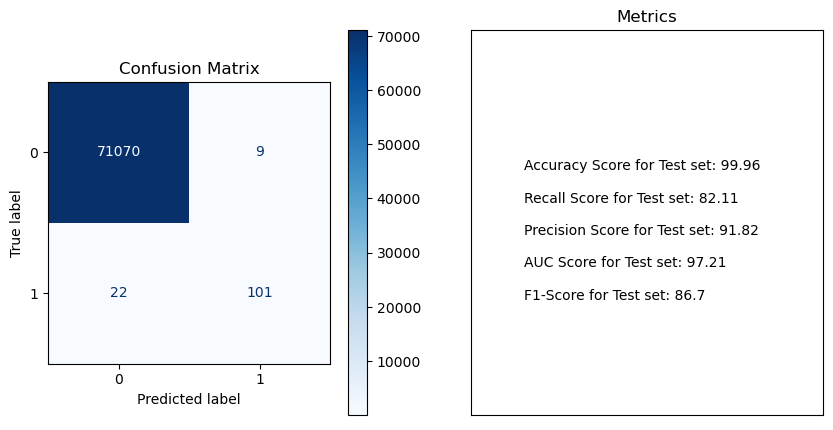

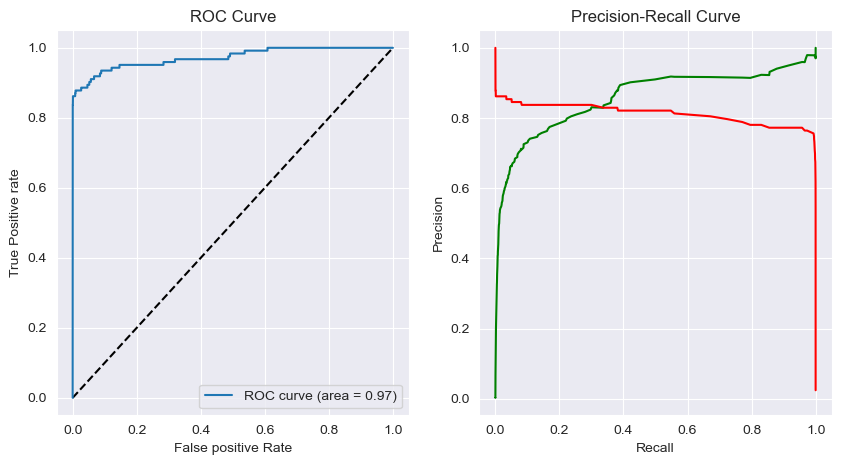

Wall time: 16min 11s


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.25,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [111]:
%%time

xg_bst_final = XGBClassifier(random_state=42,n_jobs=-1)

# fit and predict XGBoost model to dataset obtained through RFE
y_train_pred,train_pred_proba,xg_bst_model_final = fit_predict(xg_bst_final,hyperparameters_xgb,mode='ros')

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(mode='ros')

# plot a confusion matirx for model 
confusion_matrix_plot(xg_bst_model_final,mode='ros')

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost ROS Final",mode='ros')

#create an instance of decisiontree
xgb_final=XGBClassifier(random_state=42,n_jobs=-1)

xgb_final.set_params(**xg_bst_model_final.best_estimator_.get_params())

# fit and predict XGBoost model to dataset obtained through RFE
y_test_pred,test_pred_proba,xgb_model_final = fit_predict(xgb_final,hyperparameters,val_test=True,mode="ros")

# Lets evaluate the model by caltulating all the metrics
metric=calculate_metrics(True,"ros")

# plot a confusion matirx for model 
confusion_matrix_plot(xgb_model_final,True,"ros")

# plot a ROC cure and Precision-recall curve for the XGBoost Model
roc_curve_prec_curve("XGBoost ROS Final",True,"ros")

xg_bst_model_final.best_estimator_.get_params()

In [112]:
# Convert the model summary dictionray to DataFrame
model_summary = pd.DataFrame(model_eval).T
model_summary_xgb=model_summary[model_summary.index.str.contains('XGBoost')]
model_summary_xgb

Train Accuracy  Train Recall  Train Precision  \
XGBoost                     99.98         88.35            99.69   
XGBoost ROS                100.00        100.00           100.00   
XGBoost SMT                 99.99        100.00            99.98   
XGBoost ADSN                99.98        100.00            99.96   
XGBoost ROS Final          100.00        100.00           100.00   

                   Train ROC-AUC  Train F1-Score  Test Accuracy  Test Recall  \
XGBoost                    99.93           93.68          99.96        78.86   
XGBoost ROS               100.00          100.00          99.95        82.11   
XGBoost SMT               100.00           99.99          99.90        82.93   
XGBoost ADSN              100.00           99.98          99.88        81.30   
XGBoost ROS Final         100.00          100.00          99.96        82.11   

                   Test Precision  Test ROC-AUC  Test F1-Score  \
XGBoost                     94.17         95.77          85.84   
XGBoost ROS                 86.32         96.77          84.17   
XGBoost SMT                 66.23         97.88          73.65   
XGBoost ADSN                62.50         97.97          70.67   
XGBoost ROS Final           91.82         97.21          86.70   

                   Test threshold  Train threshold  
XGBoost                  0.002054         0.004761  
XGBoost ROS              0.000800         0.998436  
XGBoost SMT              0.005515         0.778296  
XGBoost ADSN             0.006167         0.771897  
XGBoost ROS Final        0.001018         0.999297

In [113]:
end_time = time.time()

In [114]:
sec = end_time-start_time
print('Time Taken :',time.strftime('%H:%M:%S', time.gmtime(sec)))

Time Taken : 02:57:01


# Conculsion

XGB ROS FInal has perfromed better than the other model which can be used to predict fraud transactions and help business prevent loss in revenue and bring trust in customers